## Cryptocurrency Data Analysis
The data is analyzed from 1/1/2016 until 13/11/2025, where all the top 5 cryptocurrencies are included. The experiment aims to summarize the data and predict future costs to be able to help traders invest in crypto accurately

This notebook provides a complete analysis of 5 major cryptocurrencies including:
- Price visualization and trends
- Exploratory Data Analysis (EDA)
- Technical indicators (EMA, SMA, MACD)
- Correlation analysis
- Machine Learning models for price prediction
- Future predictions and insights

---

### Setup and Data Loading

In [32]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Technical indicators (if ta is not installed, we already wrote manual EMA/SMA/MACD logic,
# so this is optional; you can remove these if you don't have `ta` installed)
try:
    from ta.trend import EMAIndicator, SMAIndicator, MACD
    from ta.momentum import RSIIndicator
    ta_available = True
except Exception:
    ta_available = False

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Try to import XGBoost
xgboost_available = True
try:
    import xgboost as xgb
except Exception as e:
    xgboost_available = False
    print("⚠️ XGBoost is not available on this environment.")
    print("Error:", e)
    print("The notebook will continue using Decision Tree, Random Forest, and Logistic Regression only.")

# Plot styling
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("All libraries imported (XGBoost available:", xgboost_available, ")")

⚠️ XGBoost is not available on this environment.
Error: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ["dlopen(/Users/winstonkusumahadi/Documents/SchoolProjects/Cryptocurrency_Analysis/venv/lib/python3.13/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: @rpath/libomp.dylib\n  Referenced from: <B111F8D5-6AC6-3245-A6B5-94693F6992AB> /Users/winstonkusumahadi/Documents/SchoolProjects/Cryptocurrency_Analysis/venv/lib/python3.13/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: tried: '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file)

### Data Loading and Preprocessing
Let's visualize the price movements of all 5 cryptocurrencies over time to understand their trends and volatility.

In [33]:
# Load all cryptocurrency datasets
btc_df = pd.read_csv('BTC_Historical_Data.csv', sep=';')
eth_df = pd.read_csv('ETH_Historical_Data.csv', sep=';')
bnb_df = pd.read_csv('BNB_Historical_Data.csv', sep=';')
sol_df = pd.read_csv('SOL_Historical_Data.csv', sep=';')
xrp_df = pd.read_csv('XRP_Historical_Data.csv', sep=';')

# Add cryptocurrency identifier
btc_df['crypto'] = 'BTC'
eth_df['crypto'] = 'ETH'
bnb_df['crypto'] = 'BNB'
sol_df['crypto'] = 'SOL'
xrp_df['crypto'] = 'XRP'

# Convert timestamp to datetime
for df in [btc_df, eth_df, bnb_df, sol_df, xrp_df]:
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df['date'] = df['timestamp'].dt.date
    df.sort_values('timestamp', inplace=True)
    df.reset_index(drop=True, inplace=True)

print("Data loaded successfully!")
print(f"\nBTC shape: {btc_df.shape}")
print(f"ETH shape: {eth_df.shape}")
print(f"BNB shape: {bnb_df.shape}")
print(f"SOL shape: {sol_df.shape}")
print(f"XRP shape: {xrp_df.shape}")

Data loaded successfully!

BTC shape: (399, 15)
ETH shape: (399, 15)
BNB shape: (399, 15)
SOL shape: (399, 15)
XRP shape: (399, 15)


### Combined Price Visualization


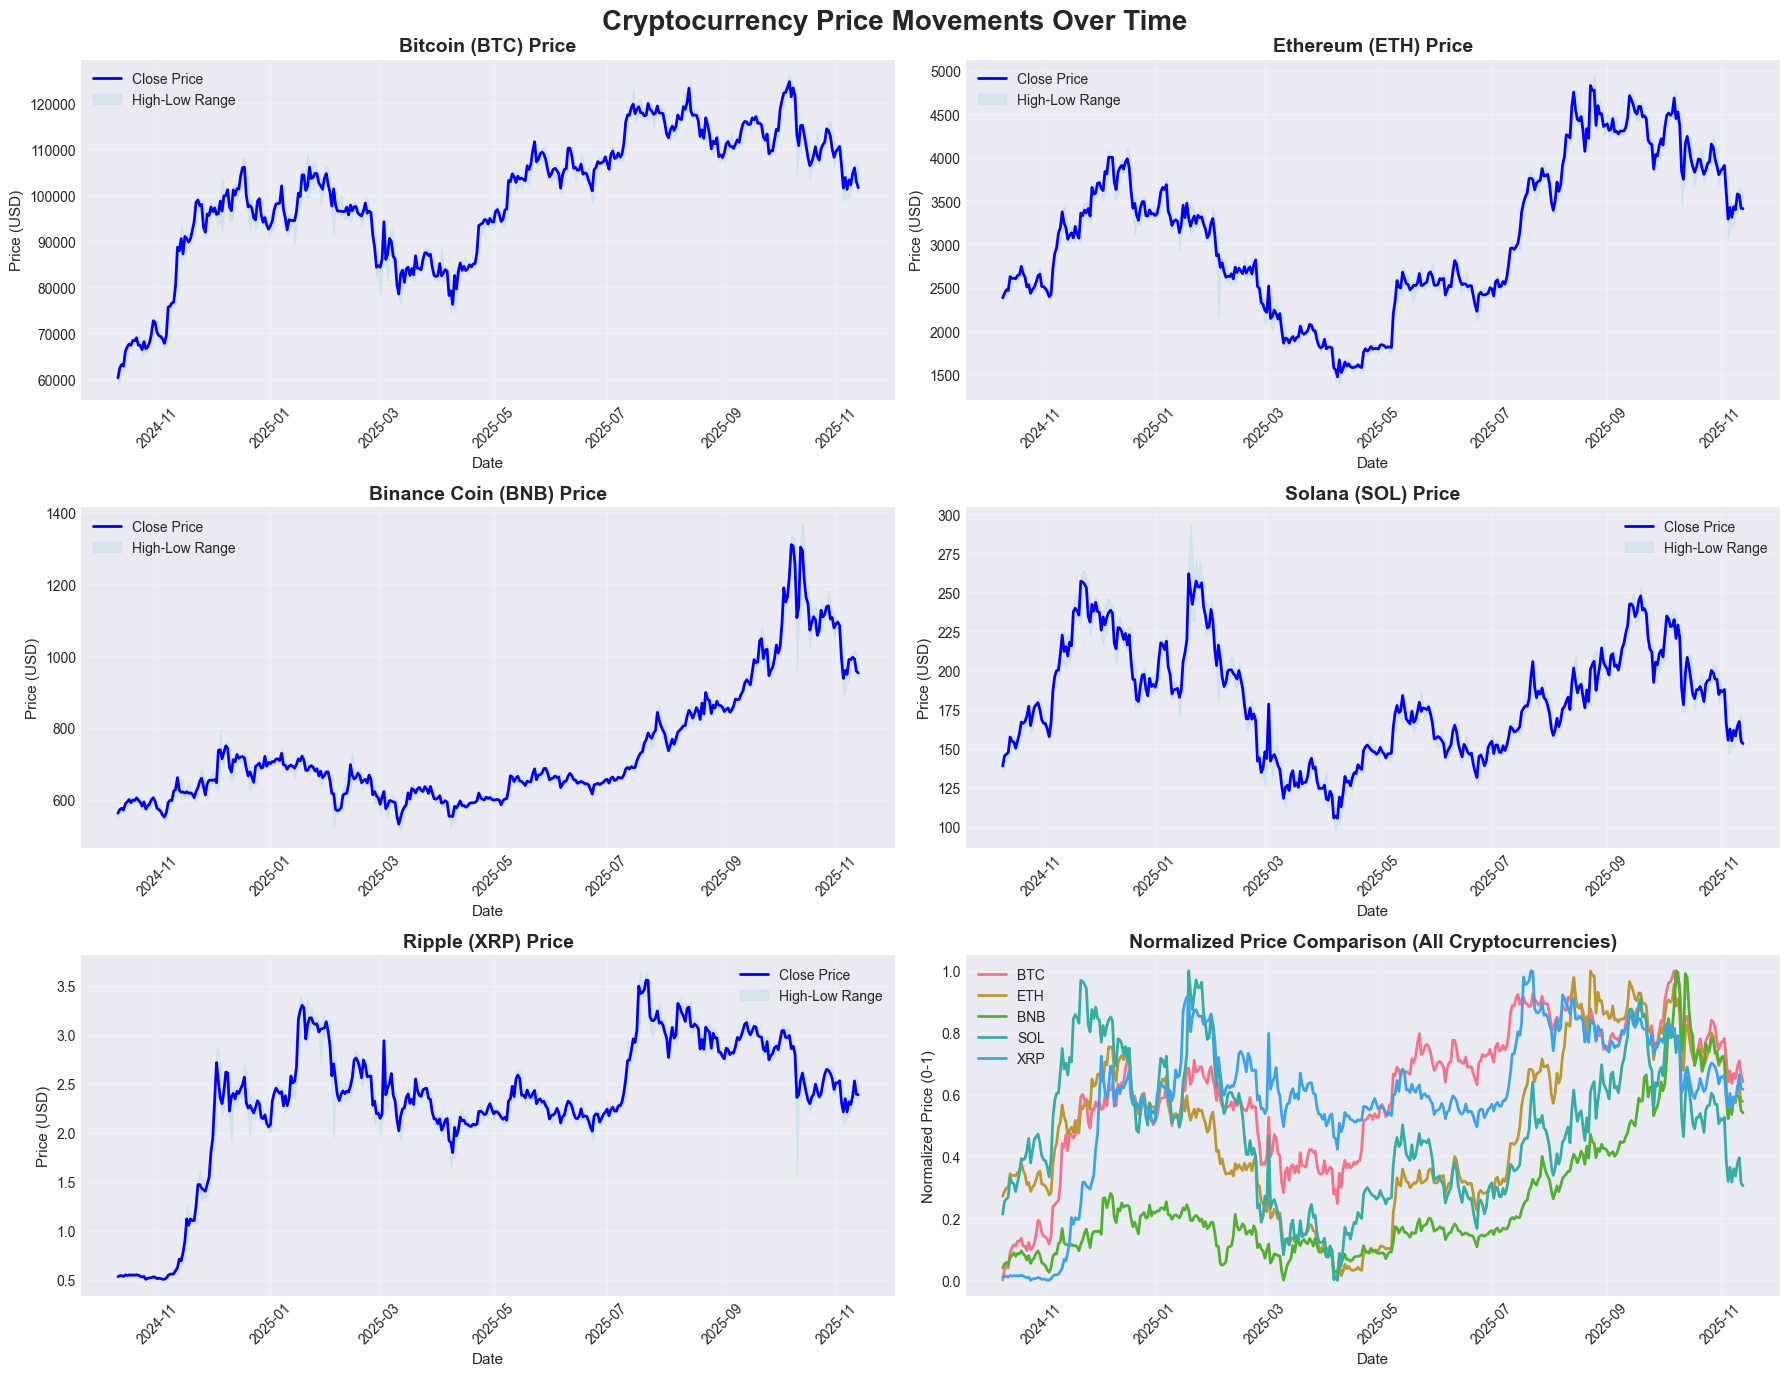

Price visualization completed!


In [34]:
# Create a comprehensive price visualization
fig, axes = plt.subplots(3, 2, figsize=(18, 14))
fig.suptitle('Cryptocurrency Price Movements Over Time', fontsize=20, fontweight='bold')

# Individual plots for each cryptocurrency
cryptos = [
    (btc_df, 'BTC', 'Bitcoin', axes[0, 0]),
    (eth_df, 'ETH', 'Ethereum', axes[0, 1]),
    (bnb_df, 'BNB', 'Binance Coin', axes[1, 0]),
    (sol_df, 'SOL', 'Solana', axes[1, 1]),
    (xrp_df, 'XRP', 'Ripple', axes[2, 0])
]

for df, symbol, name, ax in cryptos:
    ax.plot(df['timestamp'], df['close'], label='Close Price', linewidth=2, color='blue')
    ax.fill_between(df['timestamp'], df['low'], df['high'], alpha=0.3, color='lightblue', label='High-Low Range')
    ax.set_title(f'{name} ({symbol}) Price', fontsize=14, fontweight='bold')
    ax.set_xlabel('Date', fontsize=11)
    ax.set_ylabel('Price (USD)', fontsize=11)
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.tick_params(axis='x', rotation=45)

# Combined normalized plot
ax = axes[2, 1]
for df, symbol, name, _ in cryptos:
    normalized = (df['close'] - df['close'].min()) / (df['close'].max() - df['close'].min())
    ax.plot(df['timestamp'], normalized, label=symbol, linewidth=2)

ax.set_title('Normalized Price Comparison (All Cryptocurrencies)', fontsize=14, fontweight='bold')
ax.set_xlabel('Date', fontsize=11)
ax.set_ylabel('Normalized Price (0-1)', fontsize=11)
ax.legend()
ax.grid(True, alpha=0.3)
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("Price visualization completed!")

**Insights from Price Visualization:**
- The normalized comparison allows us to see relative performance regardless of absolute price differences
- We can identify periods of high volatility and correlation between different cryptocurrencies
- The high-low range shows the intraday volatility for each cryptocurrency

---

### Comprehensive EDA

In [35]:
# Function to perform EDA on each cryptocurrency
def perform_eda(df, crypto_name):
    print(f"\n{'='*60}")
    print(f"EDA for {crypto_name}")
    print(f"{'='*60}")
    
    # Basic statistics
    print("\n1. Basic Statistics:")
    print(df[['open', 'high', 'low', 'close', 'volume', 'marketCap']].describe())
    
    # Missing values
    print("\n2. Missing Values:")
    print(df.isnull().sum())
    
    # Date range
    print(f"\n3. Date Range: {df['timestamp'].min()} to {df['timestamp'].max()}")
    print(f"   Total Days: {(df['timestamp'].max() - df['timestamp'].min()).days}")
    
    # Price statistics
    print(f"\n4. Price Statistics:")
    print(f"   Average Close Price: ${df['close'].mean():,.2f}")
    print(f"   Median Close Price: ${df['close'].median():,.2f}")
    print(f"   Price Std Dev: ${df['close'].std():,.2f}")
    print(f"   Min Price: ${df['close'].min():,.2f}")
    print(f"   Max Price: ${df['close'].max():,.2f}")
    
    # Volume statistics
    print(f"\n5. Volume Statistics:")
    print(f"   Average Volume: ${df['volume'].mean():,.2f}")
    print(f"   Max Volume: ${df['volume'].max():,.2f}")
    
    return df

# Perform EDA for all cryptocurrencies
btc_df = perform_eda(btc_df, 'Bitcoin (BTC)')
eth_df = perform_eda(eth_df, 'Ethereum (ETH)')
bnb_df = perform_eda(bnb_df, 'Binance Coin (BNB)')
sol_df = perform_eda(sol_df, 'Solana (SOL)')
xrp_df = perform_eda(xrp_df, 'Ripple (XRP)')


EDA for Bitcoin (BTC)

1. Basic Statistics:
                open           high            low          close  \
count     399.000000     399.000000     399.000000     399.000000   
mean    99723.541441  101360.686177   98048.814258   99825.998464   
std     14173.941217   14076.427188   14139.535914   14038.640724   
min     60275.460835   61236.723171   58895.207808   60274.498064   
25%     92568.871364   94902.673736   90995.828650   92872.754909   
50%    102095.417583  104147.303952  100041.542703  102078.085573   
75%    110241.561068  111820.715944  108732.309944  110240.967724   
max    124752.139724  126198.069603  123196.048902  124752.528352   

             volume     marketCap  
count  3.990000e+02  3.990000e+02  
mean   5.355465e+10  1.982787e+12  
std    2.511619e+10  2.825148e+11  
min    9.863214e+09  1.191401e+12  
25%    3.655321e+10  1.838450e+12  
50%    4.988708e+10  2.025909e+12  
75%    6.852624e+10  2.194904e+12  
max    1.817464e+11  2.486340e+12  

2. Missi

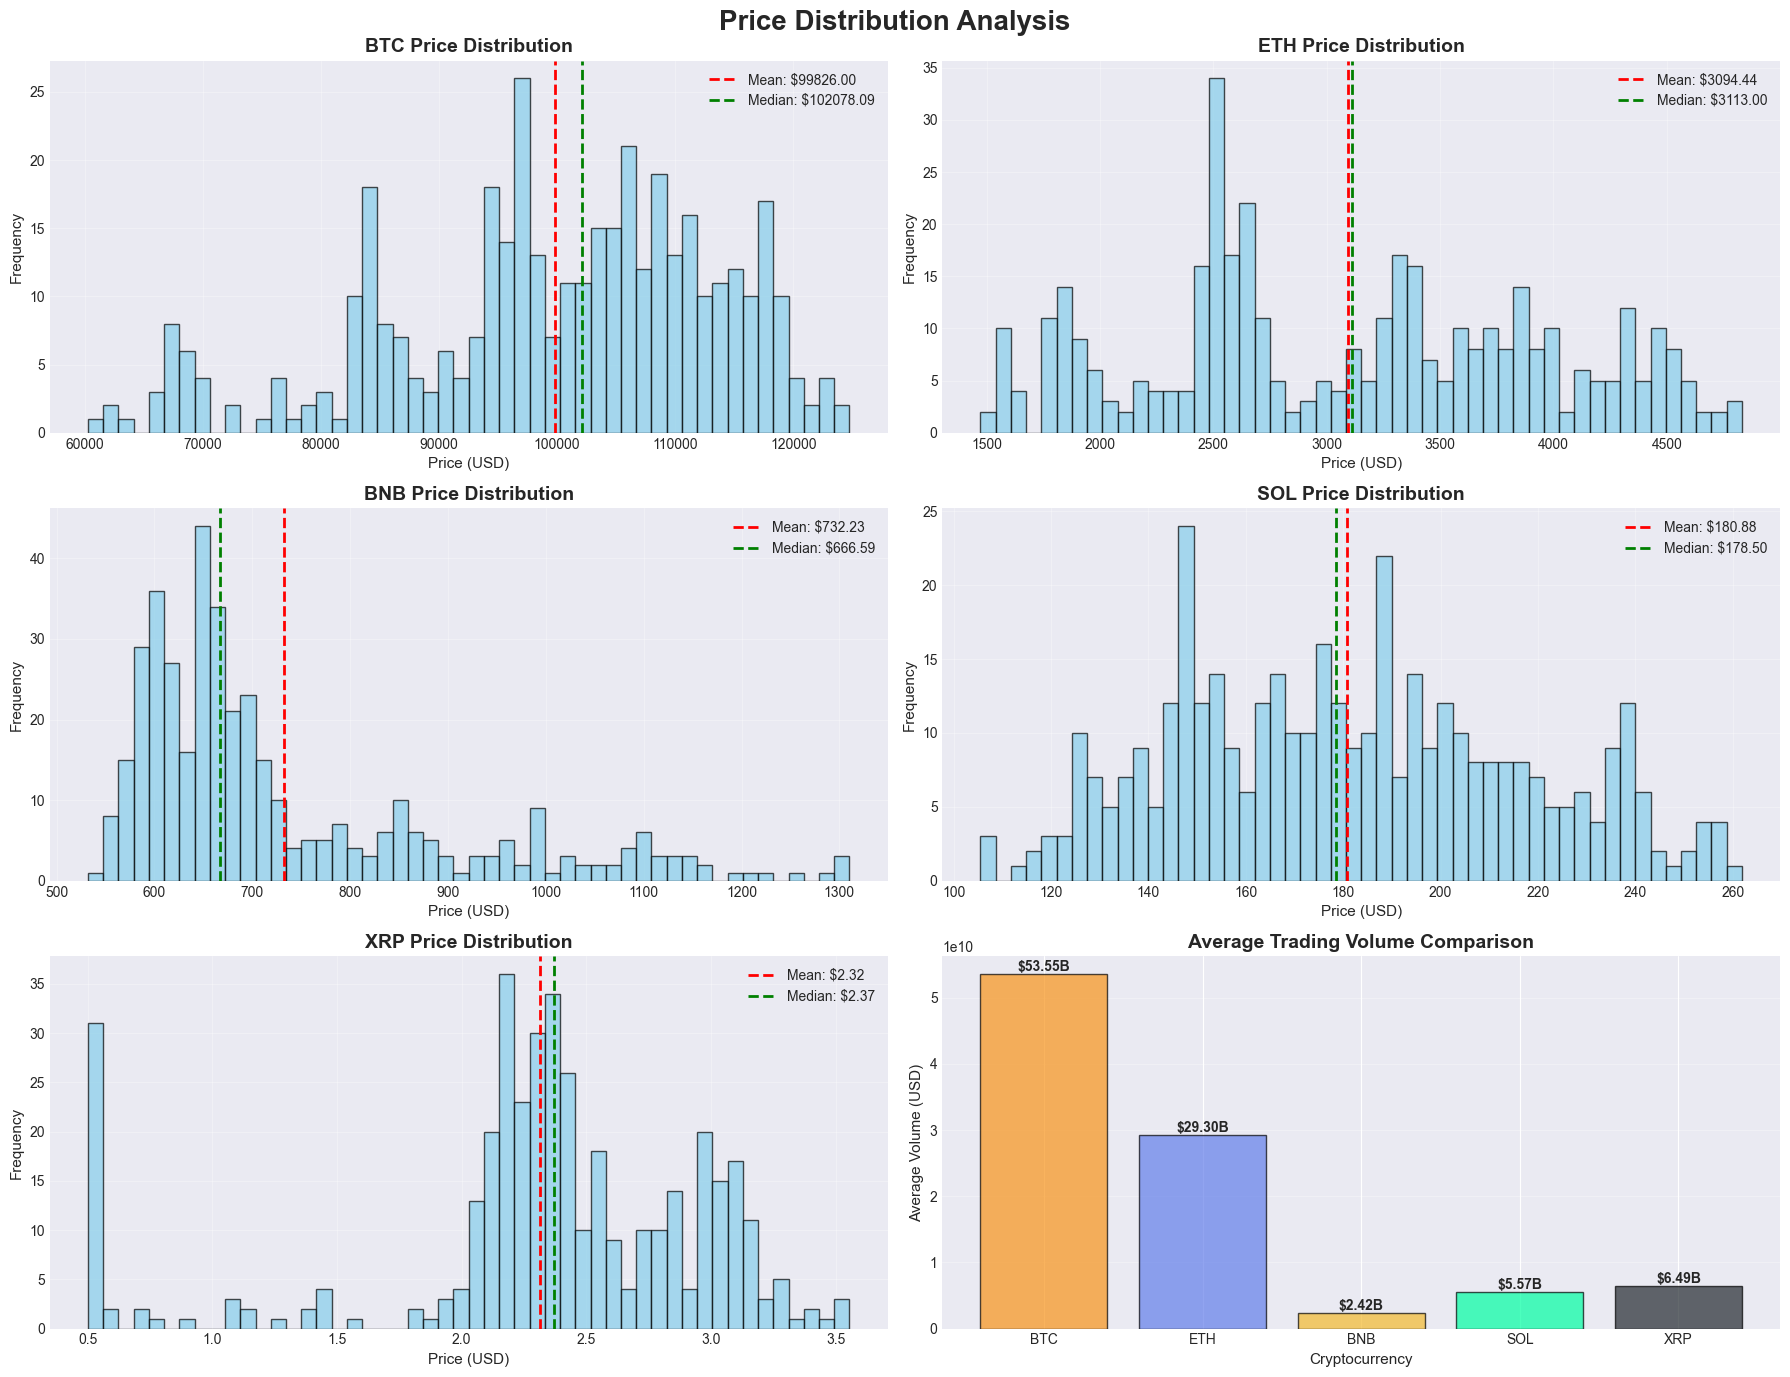

In [36]:
# Visualize distributions
fig, axes = plt.subplots(3, 2, figsize=(18, 14))
fig.suptitle('Price Distribution Analysis', fontsize=20, fontweight='bold')

cryptos_data = [
    (btc_df, 'BTC', axes[0, 0]),
    (eth_df, 'ETH', axes[0, 1]),
    (bnb_df, 'BNB', axes[1, 0]),
    (sol_df, 'SOL', axes[1, 1]),
    (xrp_df, 'XRP', axes[2, 0])
]

for df, symbol, ax in cryptos_data:
    ax.hist(df['close'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    ax.axvline(df['close'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: ${df["close"].mean():.2f}')
    ax.axvline(df['close'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: ${df["close"].median():.2f}')
    ax.set_title(f'{symbol} Price Distribution', fontsize=14, fontweight='bold')
    ax.set_xlabel('Price (USD)', fontsize=11)
    ax.set_ylabel('Frequency', fontsize=11)
    ax.legend()
    ax.grid(True, alpha=0.3)

# Volume comparison
ax = axes[2, 1]
volumes = [btc_df['volume'].mean(), eth_df['volume'].mean(), bnb_df['volume'].mean(), 
           sol_df['volume'].mean(), xrp_df['volume'].mean()]
symbols = ['BTC', 'ETH', 'BNB', 'SOL', 'XRP']
colors = ['#F7931A', '#627EEA', '#F3BA2F', '#00FFA3', '#23292F']

bars = ax.bar(symbols, volumes, color=colors, alpha=0.7, edgecolor='black')
ax.set_title('Average Trading Volume Comparison', fontsize=14, fontweight='bold')
ax.set_xlabel('Cryptocurrency', fontsize=11)
ax.set_ylabel('Average Volume (USD)', fontsize=11)
ax.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'${height/1e9:.2f}B',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

**EDA Key Findings:**
- Statistical summaries provide insights into price ranges, volatility, and trading volumes
- Distribution plots show whether prices are normally distributed or skewed
- Volume comparison reveals which cryptocurrencies have the highest trading activity
- Missing value analysis ensures data quality

---

### Technical Indicators Analysis

We'll calculate and visualize key technical indicators:
- **EMA (Exponential Moving Average)**: Gives more weight to recent prices
- **SMA (Simple Moving Average)**: Equal weight to all prices in the period
- **MACD (Moving Average Convergence Divergence)**: Trend-following momentum indicator
- **Percentage Changes**: Daily returns and cumulative returns

In [37]:
# Function to calculate technical indicators
def calculate_indicators(df, crypto_name):
    print(f"Calculating indicators for {crypto_name}...")
    
    # Calculate percentage change
    df['daily_return'] = df['close'].pct_change() * 100
    df['cumulative_return'] = (1 + df['close'].pct_change()).cumprod() - 1
    
    # Calculate increase/decrease percentage
    df['price_change'] = df['close'].diff()
    df['price_change_pct'] = df['price_change'] / df['close'].shift(1) * 100
    
    # Simple Moving Averages
    df['SMA_7'] = df['close'].rolling(window=7).mean()
    df['SMA_14'] = df['close'].rolling(window=14).mean()
    df['SMA_30'] = df['close'].rolling(window=30).mean()
    
    # Exponential Moving Averages
    df['EMA_7'] = df['close'].ewm(span=7, adjust=False).mean()
    df['EMA_14'] = df['close'].ewm(span=14, adjust=False).mean()
    df['EMA_30'] = df['close'].ewm(span=30, adjust=False).mean()
    
    # MACD
    df['EMA_12'] = df['close'].ewm(span=12, adjust=False).mean()
    df['EMA_26'] = df['close'].ewm(span=26, adjust=False).mean()
    df['MACD'] = df['EMA_12'] - df['EMA_26']
    df['MACD_signal'] = df['MACD'].ewm(span=9, adjust=False).mean()
    df['MACD_histogram'] = df['MACD'] - df['MACD_signal']
    
    # RSI (Relative Strength Index)
    delta = df['close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))
    
    # Volatility
    df['volatility'] = df['daily_return'].rolling(window=14).std()
    
    print(f"✓ Indicators calculated for {crypto_name}")
    return df

# Calculate indicators for all cryptocurrencies
btc_df = calculate_indicators(btc_df, 'BTC')
eth_df = calculate_indicators(eth_df, 'ETH')
bnb_df = calculate_indicators(bnb_df, 'BNB')
sol_df = calculate_indicators(sol_df, 'SOL')
xrp_df = calculate_indicators(xrp_df, 'XRP')

print("\n✓ All technical indicators calculated successfully!")

Calculating indicators for BTC...
✓ Indicators calculated for BTC
Calculating indicators for ETH...
✓ Indicators calculated for ETH
Calculating indicators for BNB...
✓ Indicators calculated for BNB
Calculating indicators for SOL...
✓ Indicators calculated for SOL
Calculating indicators for XRP...
✓ Indicators calculated for XRP

✓ All technical indicators calculated successfully!


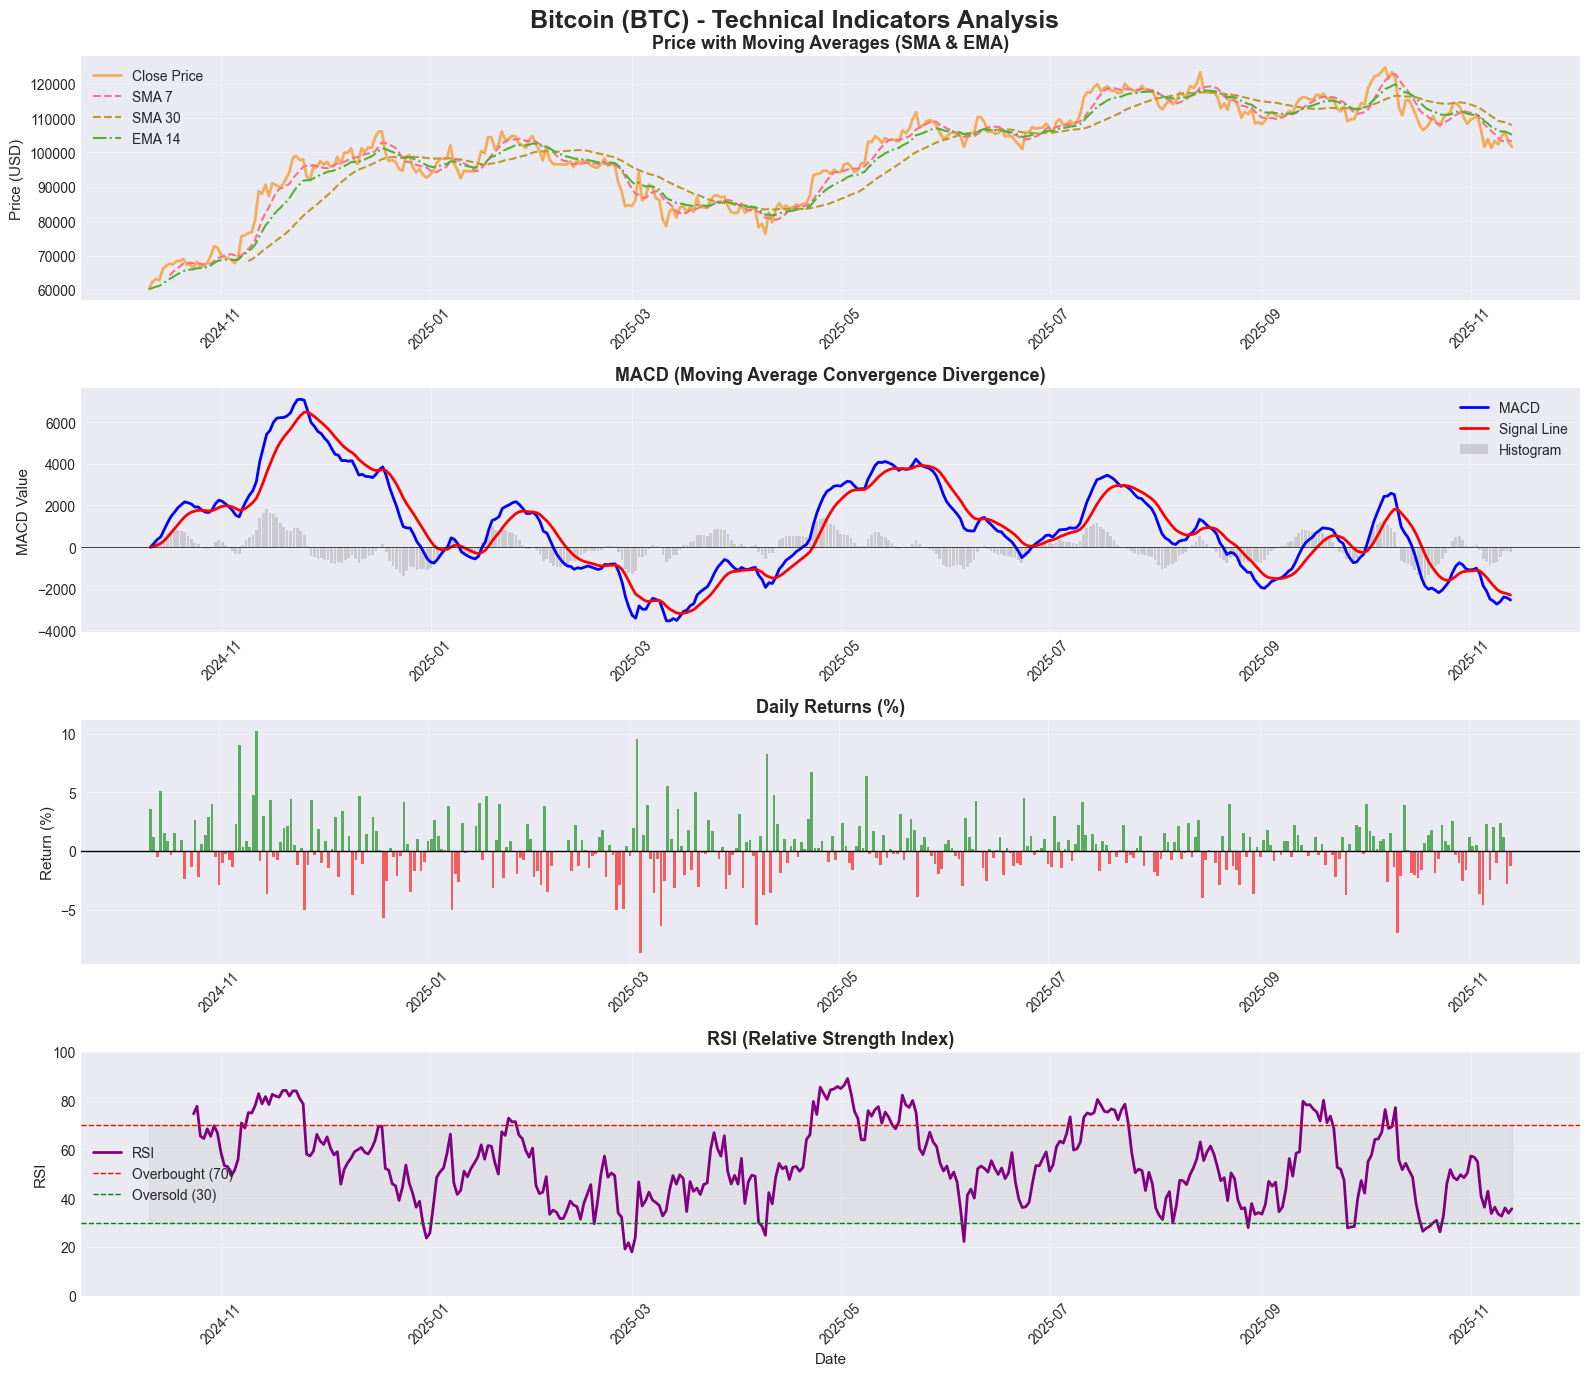

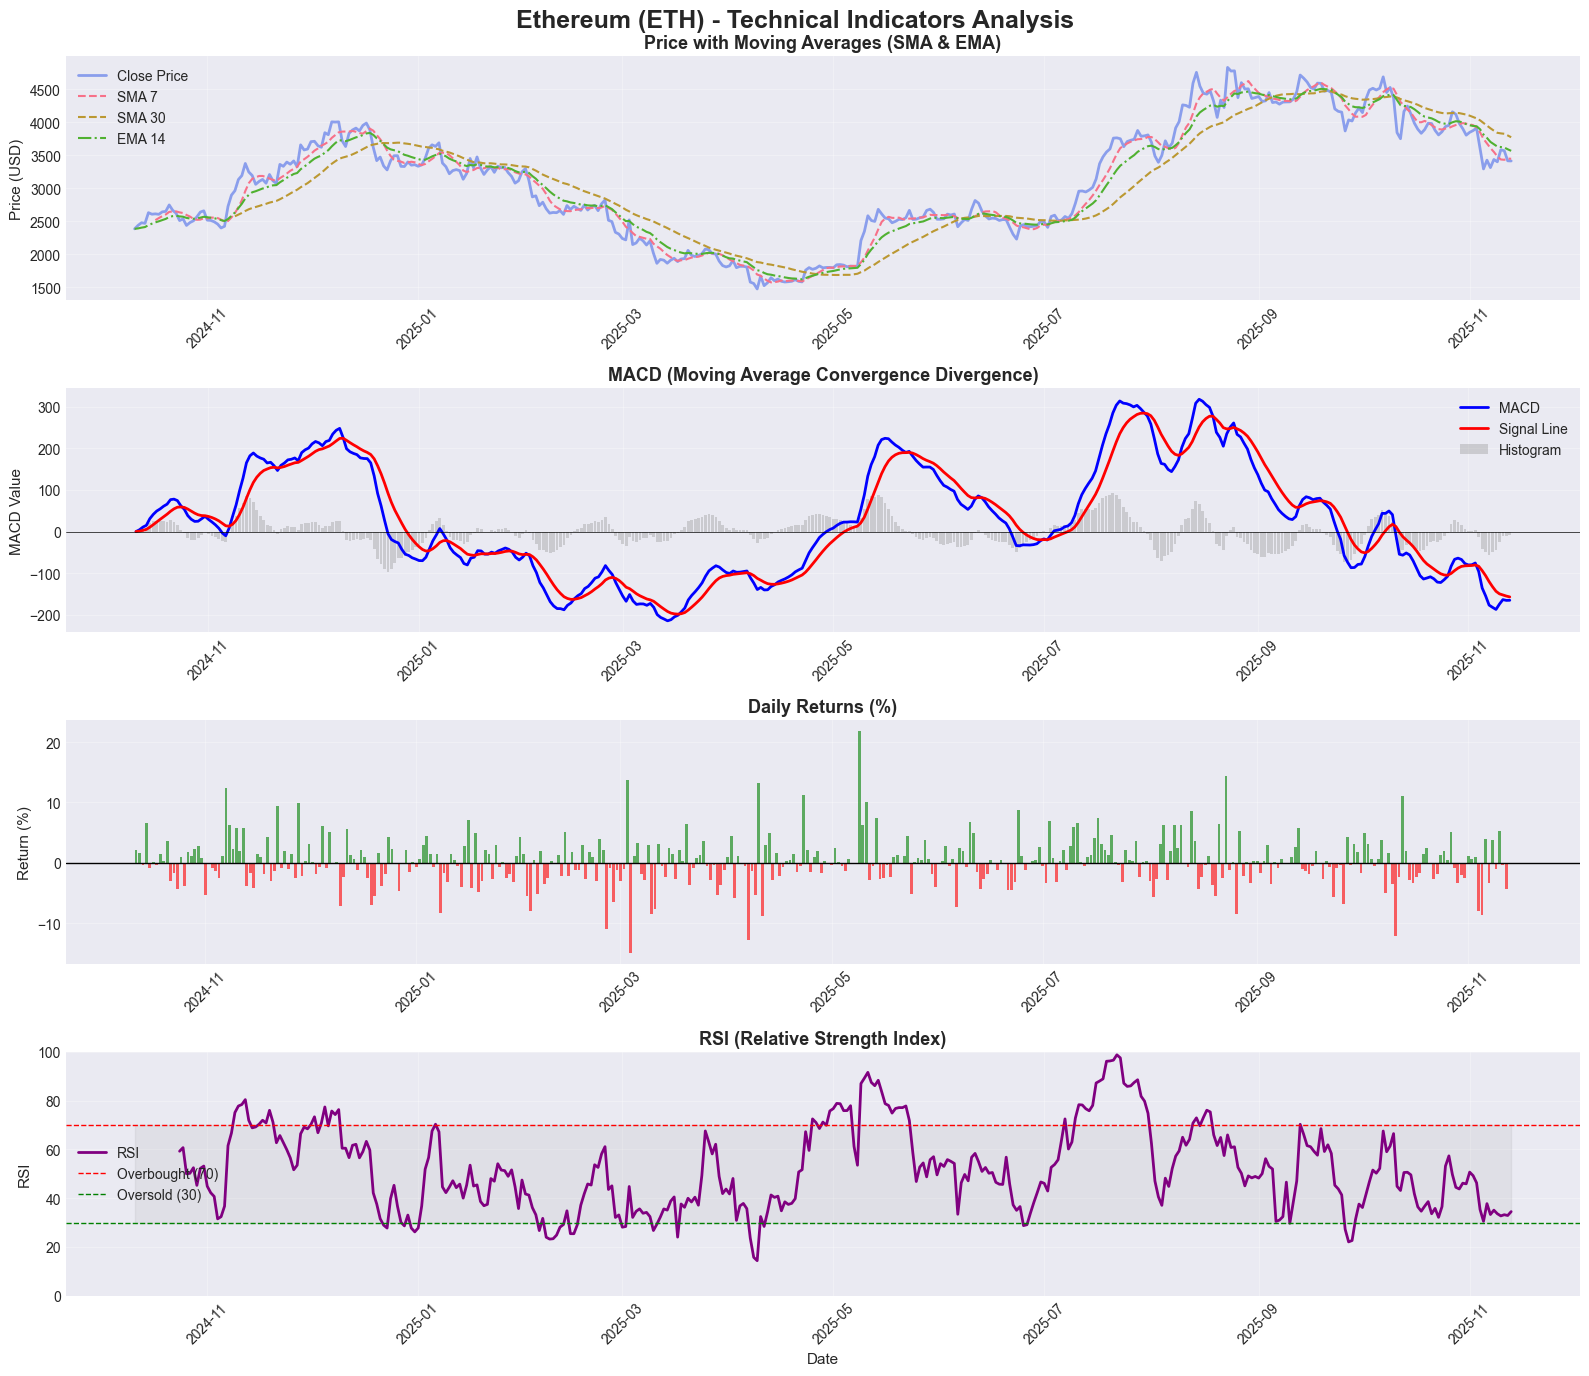

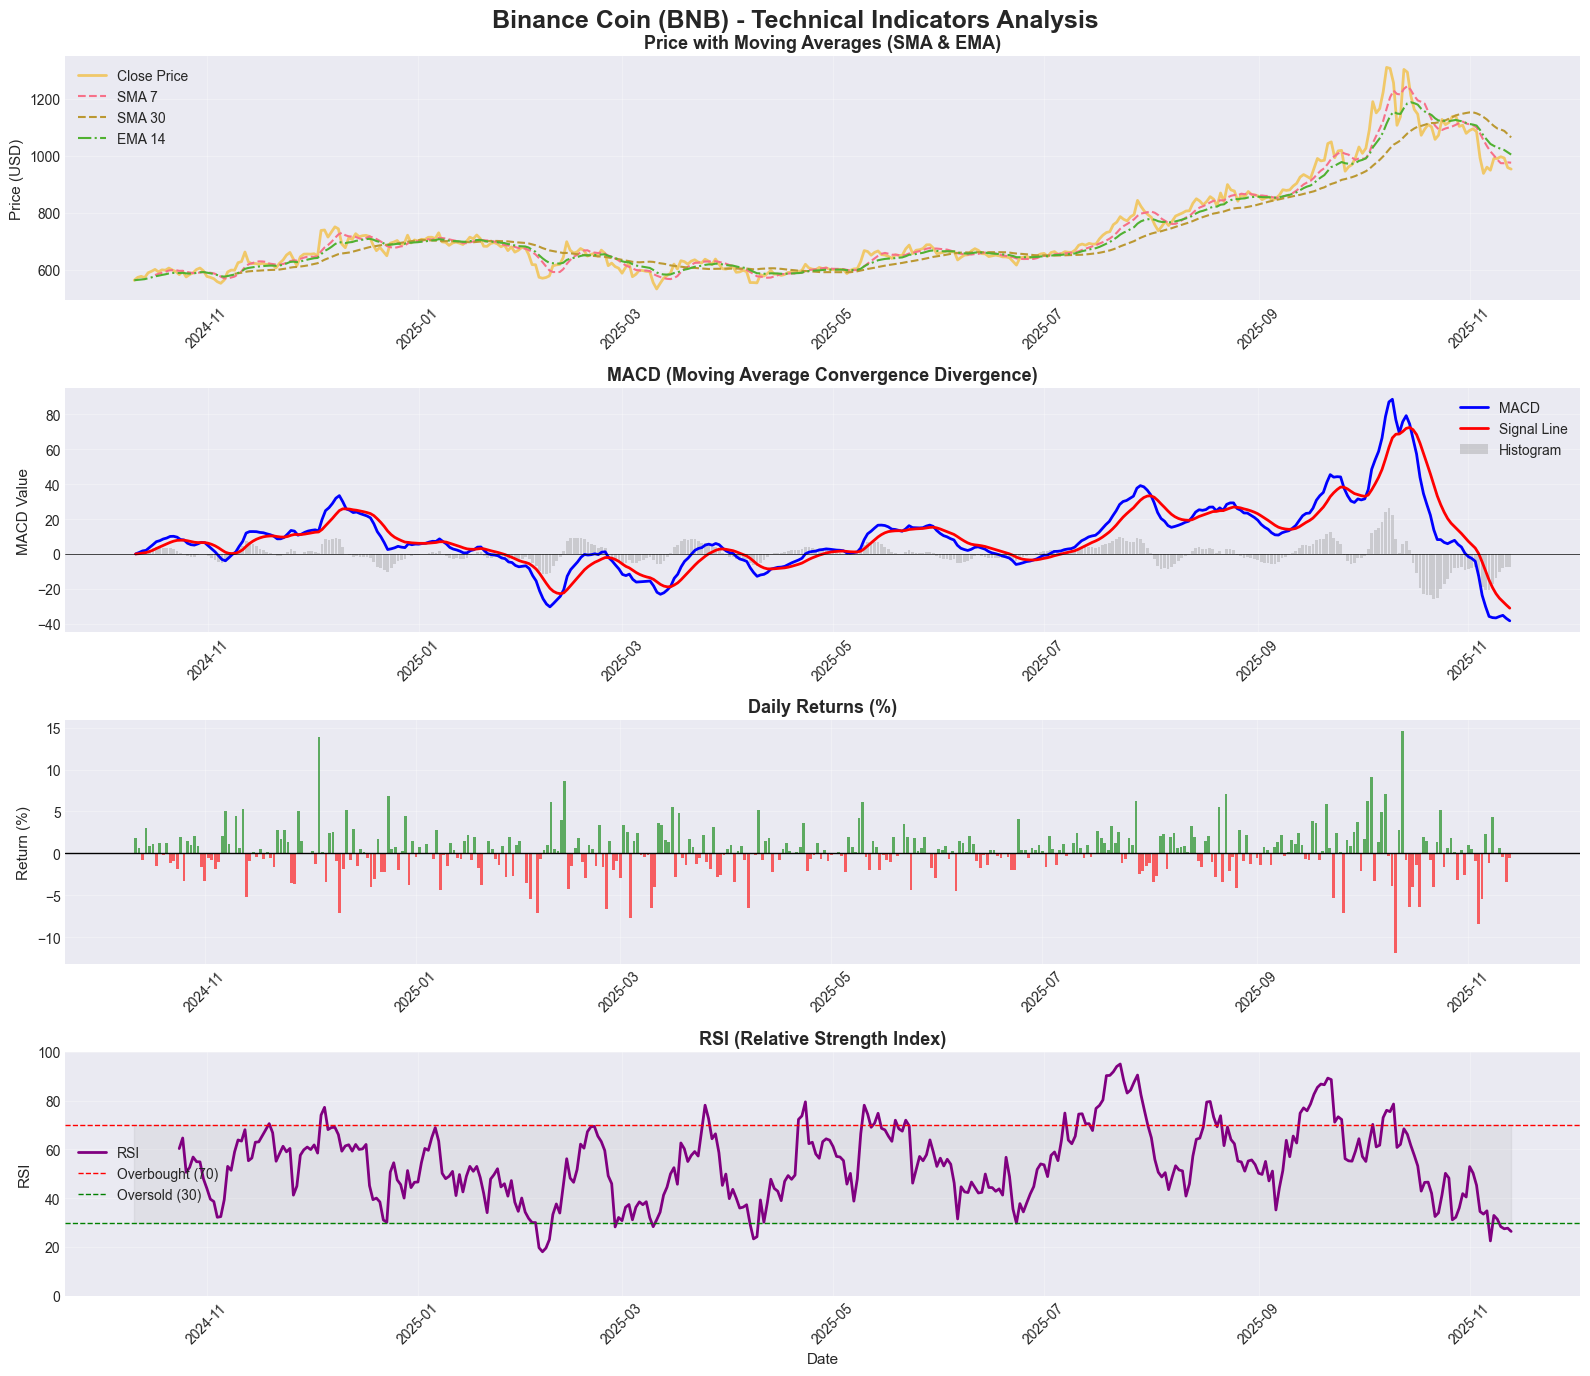

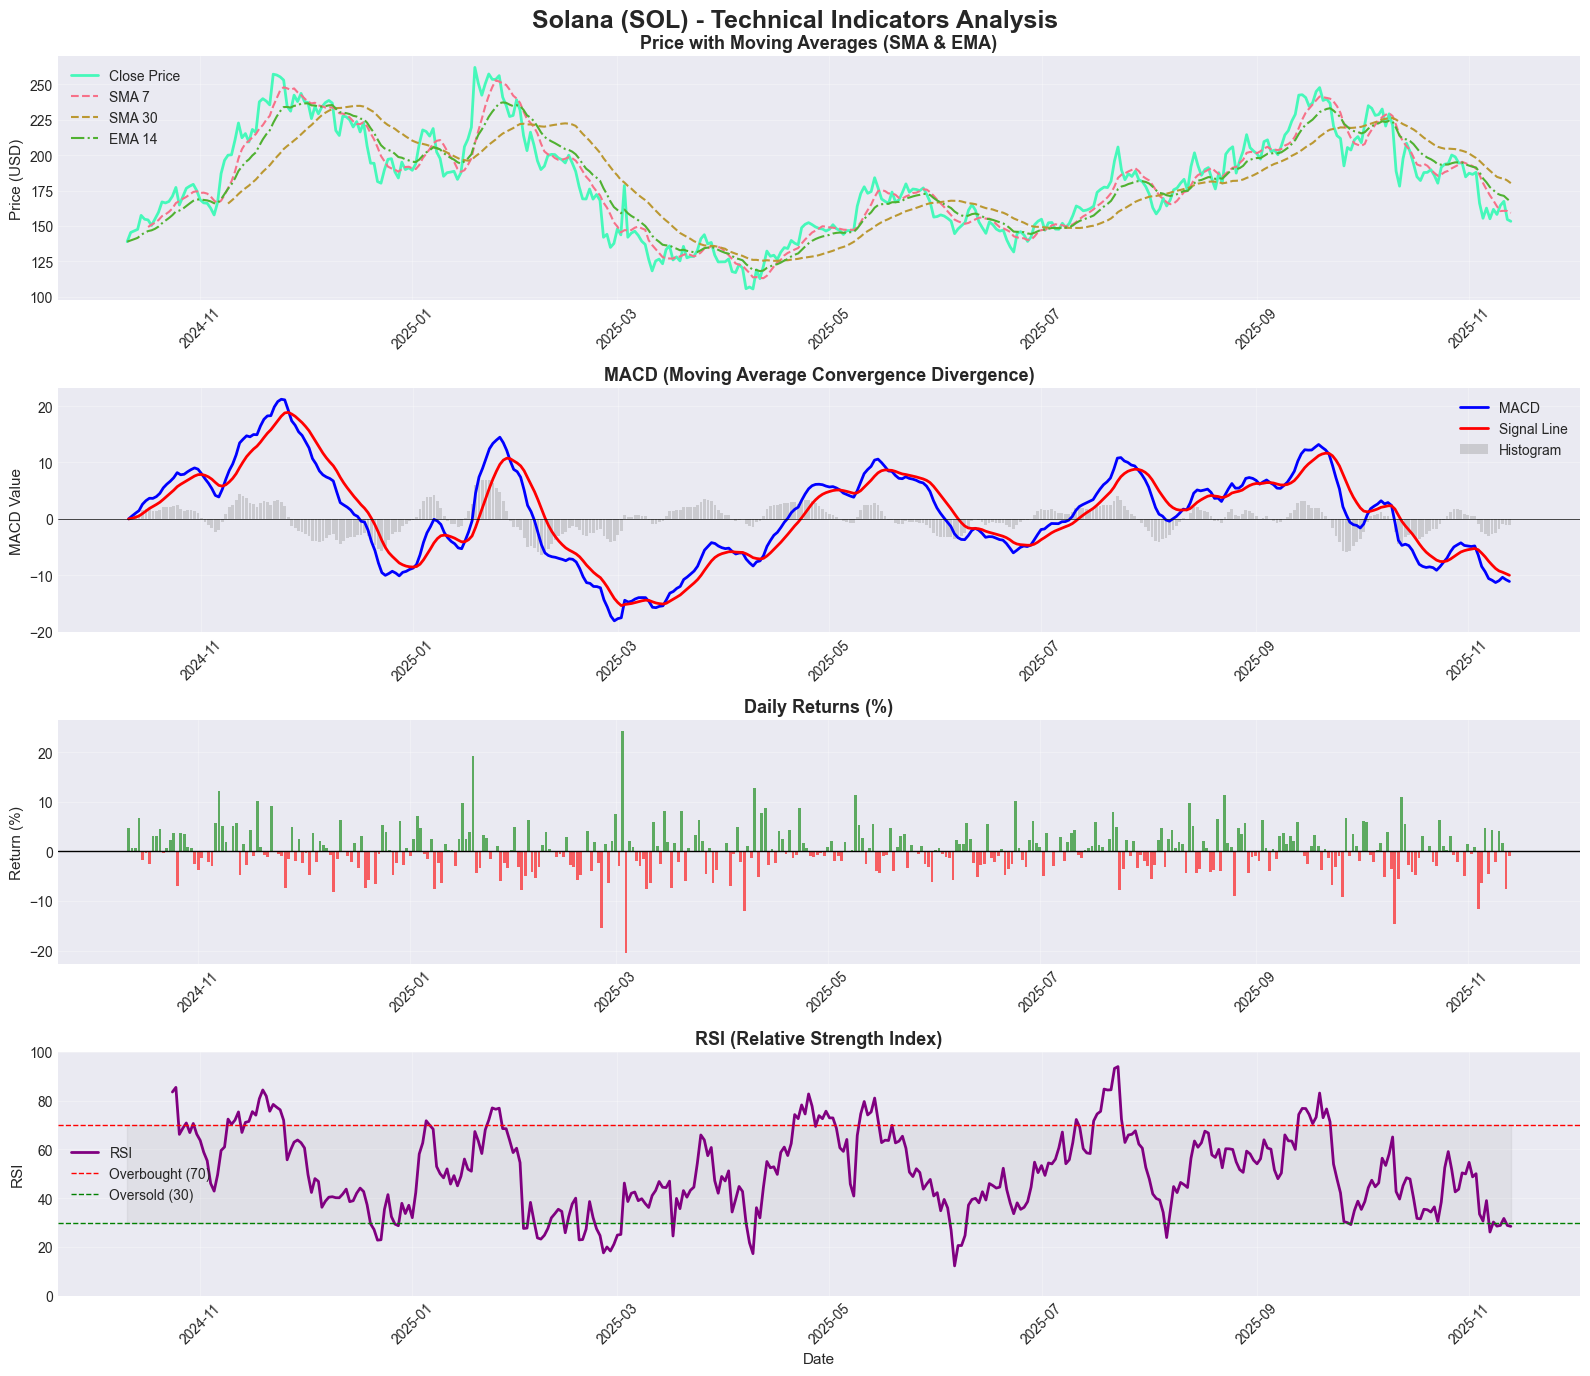

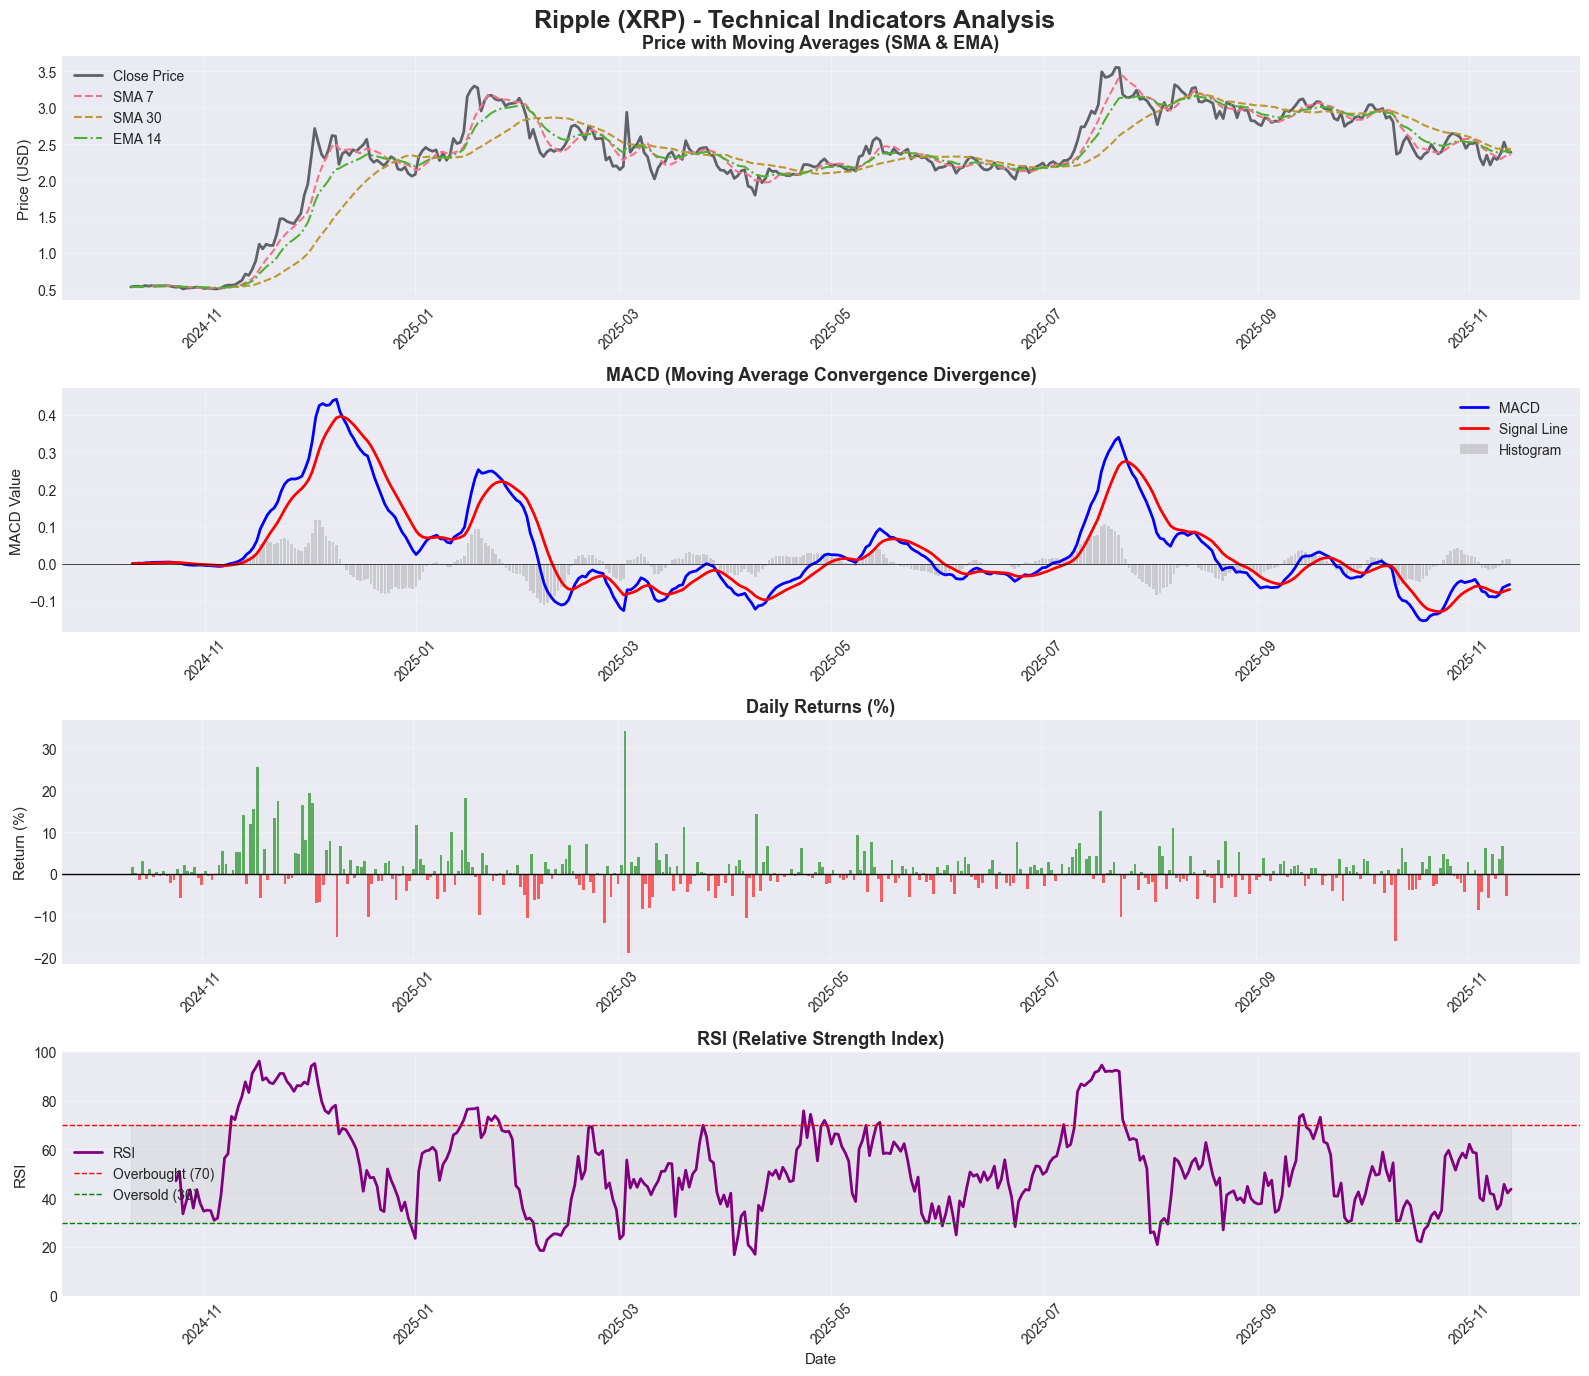

In [38]:
# Visualize technical indicators for each cryptocurrency
def plot_technical_indicators(df, crypto_name, color='blue'):
    fig, axes = plt.subplots(4, 1, figsize=(16, 14))
    fig.suptitle(f'{crypto_name} - Technical Indicators Analysis', fontsize=18, fontweight='bold')
    
    # 1. Price with Moving Averages
    ax1 = axes[0]
    ax1.plot(df['timestamp'], df['close'], label='Close Price', linewidth=2, color=color, alpha=0.7)
    ax1.plot(df['timestamp'], df['SMA_7'], label='SMA 7', linewidth=1.5, linestyle='--')
    ax1.plot(df['timestamp'], df['SMA_30'], label='SMA 30', linewidth=1.5, linestyle='--')
    ax1.plot(df['timestamp'], df['EMA_14'], label='EMA 14', linewidth=1.5, linestyle='-.')
    ax1.set_title('Price with Moving Averages (SMA & EMA)', fontsize=13, fontweight='bold')
    ax1.set_ylabel('Price (USD)', fontsize=11)
    ax1.legend(loc='best')
    ax1.grid(True, alpha=0.3)
    
    # 2. MACD
    ax2 = axes[1]
    ax2.plot(df['timestamp'], df['MACD'], label='MACD', linewidth=2, color='blue')
    ax2.plot(df['timestamp'], df['MACD_signal'], label='Signal Line', linewidth=2, color='red')
    ax2.bar(df['timestamp'], df['MACD_histogram'], label='Histogram', alpha=0.3, color='gray')
    ax2.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
    ax2.set_title('MACD (Moving Average Convergence Divergence)', fontsize=13, fontweight='bold')
    ax2.set_ylabel('MACD Value', fontsize=11)
    ax2.legend(loc='best')
    ax2.grid(True, alpha=0.3)
    
    # 3. Daily Returns
    ax3 = axes[2]
    colors_returns = ['green' if x > 0 else 'red' for x in df['daily_return']]
    ax3.bar(df['timestamp'], df['daily_return'], color=colors_returns, alpha=0.6)
    ax3.axhline(y=0, color='black', linestyle='-', linewidth=1)
    ax3.set_title('Daily Returns (%)', fontsize=13, fontweight='bold')
    ax3.set_ylabel('Return (%)', fontsize=11)
    ax3.grid(True, alpha=0.3)
    
    # 4. RSI
    ax4 = axes[3]
    ax4.plot(df['timestamp'], df['RSI'], label='RSI', linewidth=2, color='purple')
    ax4.axhline(y=70, color='red', linestyle='--', linewidth=1, label='Overbought (70)')
    ax4.axhline(y=30, color='green', linestyle='--', linewidth=1, label='Oversold (30)')
    ax4.fill_between(df['timestamp'], 30, 70, alpha=0.1, color='gray')
    ax4.set_title('RSI (Relative Strength Index)', fontsize=13, fontweight='bold')
    ax4.set_xlabel('Date', fontsize=11)
    ax4.set_ylabel('RSI', fontsize=11)
    ax4.legend(loc='best')
    ax4.grid(True, alpha=0.3)
    ax4.set_ylim(0, 100)
    
    for ax in axes:
        ax.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

# Plot for each cryptocurrency
plot_technical_indicators(btc_df, 'Bitcoin (BTC)', '#F7931A')
plot_technical_indicators(eth_df, 'Ethereum (ETH)', '#627EEA')
plot_technical_indicators(bnb_df, 'Binance Coin (BNB)', '#F3BA2F')
plot_technical_indicators(sol_df, 'Solana (SOL)', '#00FFA3')
plot_technical_indicators(xrp_df, 'Ripple (XRP)', '#23292F')

In [39]:
# Summary statistics for returns
print("\n" + "="*80)
print("RETURNS SUMMARY STATISTICS")
print("="*80)

summary_data = []
for df, name in [(btc_df, 'BTC'), (eth_df, 'ETH'), (bnb_df, 'BNB'), 
                  (sol_df, 'SOL'), (xrp_df, 'XRP')]:
    summary_data.append({
        'Crypto': name,
        'Avg Daily Return (%)': df['daily_return'].mean(),
        'Std Dev (%)': df['daily_return'].std(),
        'Min Return (%)': df['daily_return'].min(),
        'Max Return (%)': df['daily_return'].max(),
        'Total Return (%)': df['cumulative_return'].iloc[-1] * 100,
        'Avg RSI': df['RSI'].mean()
    })

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))


RETURNS SUMMARY STATISTICS
Crypto  Avg Daily Return (%)  Std Dev (%)  Min Return (%)  Max Return (%)  Total Return (%)   Avg RSI
   BTC              0.158086     2.319060       -8.682043       10.223530         68.666998 54.194976
   ETH              0.167473     3.958569      -14.847855       21.798774         43.175242 52.172661
   BNB              0.171536     2.807507      -11.863454       14.590052         69.356109 54.277243
   SOL              0.127105     4.540521      -20.434357       24.234992         10.349050 51.102349
   XRP              0.502427     5.080064      -18.767817       34.070078        350.377189 52.650779


**Technical Indicators Insights:**
- **Moving Averages**: Help identify trends - when price is above MA, it's bullish; below is bearish
- **MACD**: When MACD crosses above signal line, it's a bullish signal; below is bearish
- **Daily Returns**: Show volatility and risk - higher variance means higher risk
- **RSI**: Values above 70 indicate overbought conditions; below 30 indicate oversold
- **Cumulative Returns**: Show total performance over the period

---


### Correlation Analysis

Understanding how these cryptocurrencies move together is crucial for portfolio diversification.

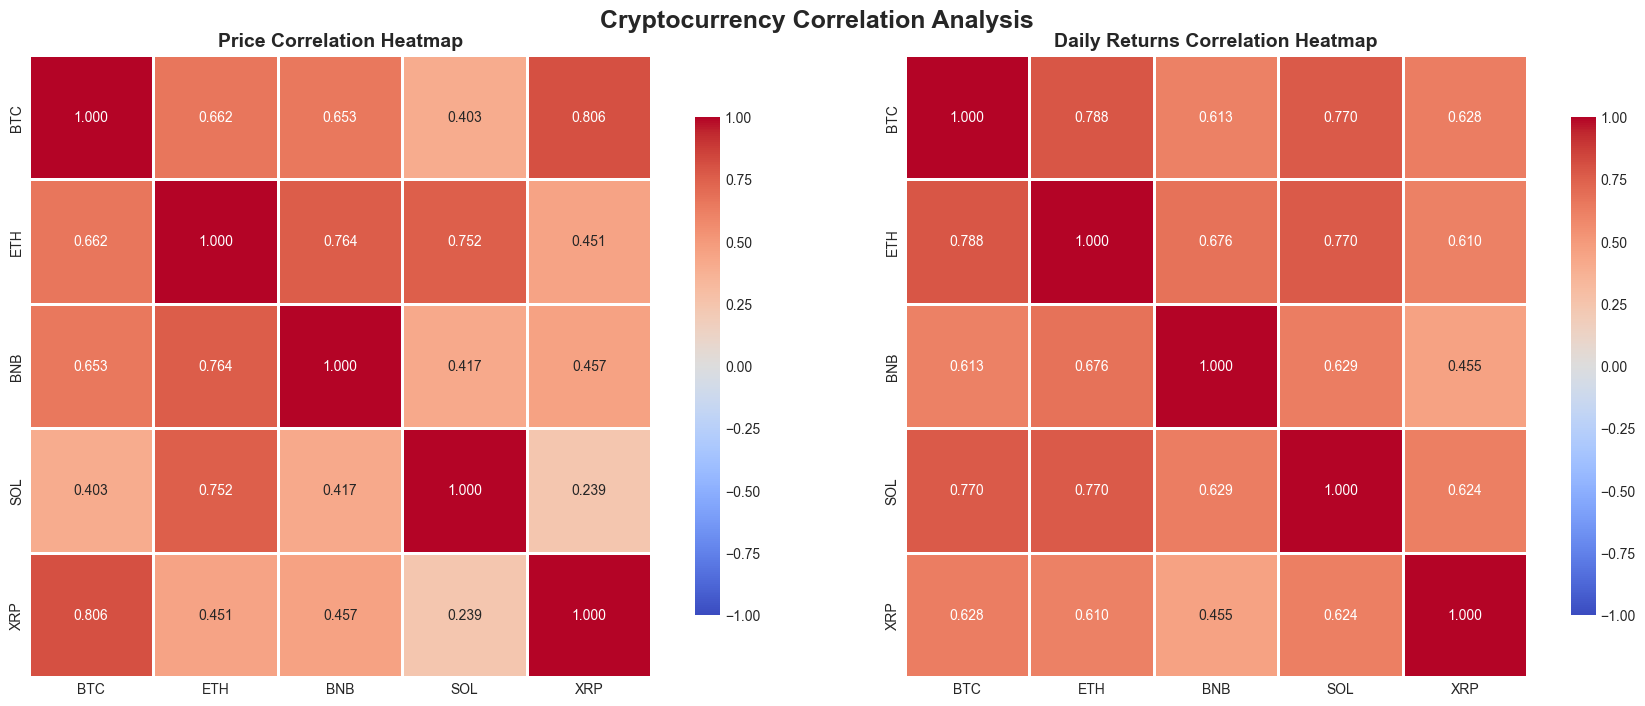


Price Correlation Matrix:
          BTC       ETH       BNB       SOL       XRP
BTC  1.000000  0.662297  0.652794  0.402722  0.805977
ETH  0.662297  1.000000  0.763839  0.752146  0.451401
BNB  0.652794  0.763839  1.000000  0.417290  0.457013
SOL  0.402722  0.752146  0.417290  1.000000  0.239010
XRP  0.805977  0.451401  0.457013  0.239010  1.000000


Returns Correlation Matrix:
          BTC       ETH       BNB       SOL       XRP
BTC  1.000000  0.788262  0.612730  0.769561  0.628379
ETH  0.788262  1.000000  0.675871  0.769913  0.609900
BNB  0.612730  0.675871  1.000000  0.629199  0.454810
SOL  0.769561  0.769913  0.629199  1.000000  0.624041
XRP  0.628379  0.609900  0.454810  0.624041  1.000000


In [40]:
# Create a combined dataframe for correlation analysis
correlation_df = pd.DataFrame({
    'BTC': btc_df['close'].values,
    'ETH': eth_df['close'].values,
    'BNB': bnb_df['close'].values,
    'SOL': sol_df['close'].values,
    'XRP': xrp_df['close'].values
})

# Calculate correlation matrix
correlation_matrix = correlation_df.corr()

# Create correlation heatmap
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle('Cryptocurrency Correlation Analysis', fontsize=18, fontweight='bold')

# Price correlation
ax1 = axes[0]
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', 
            center=0, square=True, linewidths=2, cbar_kws={"shrink": 0.8},
            ax=ax1, vmin=-1, vmax=1)
ax1.set_title('Price Correlation Heatmap', fontsize=14, fontweight='bold')

# Returns correlation
returns_df = pd.DataFrame({
    'BTC': btc_df['daily_return'].values,
    'ETH': eth_df['daily_return'].values,
    'BNB': bnb_df['daily_return'].values,
    'SOL': sol_df['daily_return'].values,
    'XRP': xrp_df['daily_return'].values
})

returns_correlation = returns_df.corr()

ax2 = axes[1]
sns.heatmap(returns_correlation, annot=True, fmt='.3f', cmap='coolwarm', 
            center=0, square=True, linewidths=2, cbar_kws={"shrink": 0.8},
            ax=ax2, vmin=-1, vmax=1)
ax2.set_title('Daily Returns Correlation Heatmap', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\nPrice Correlation Matrix:")
print(correlation_matrix)
print("\n" + "="*60)
print("\nReturns Correlation Matrix:")
print(returns_correlation)

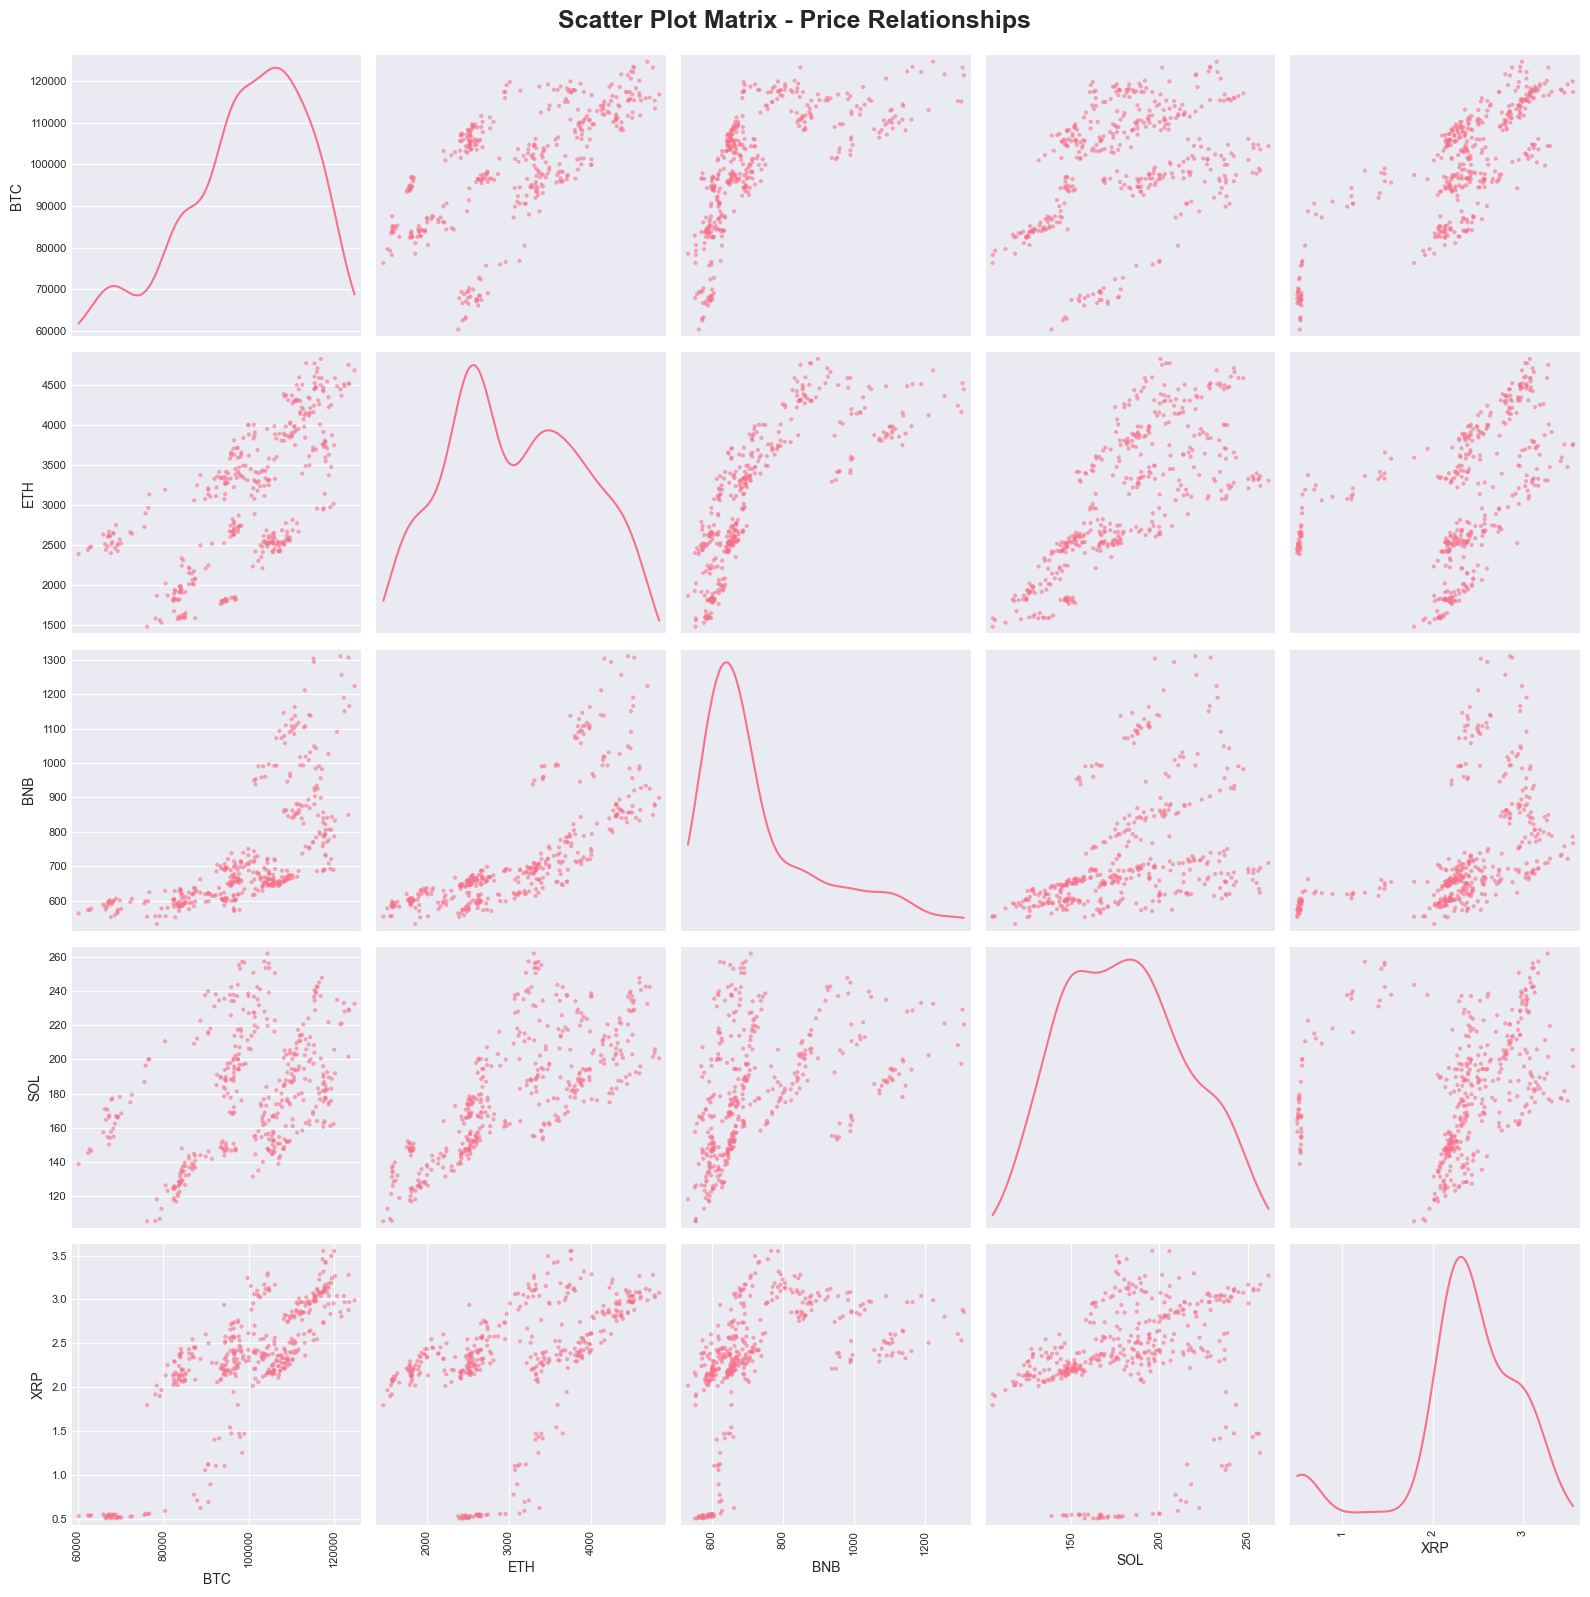

In [41]:
# Scatter plot matrix for visual correlation
from pandas.plotting import scatter_matrix

fig, ax = plt.subplots(figsize=(16, 16))
scatter_matrix(correlation_df, alpha=0.6, figsize=(16, 16), diagonal='kde', ax=ax)
plt.suptitle('Scatter Plot Matrix - Price Relationships', fontsize=18, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

**Correlation Insights:**
- High positive correlation (>0.7) indicates cryptocurrencies move together
- Low correlation (<0.3) suggests diversification benefits
- Returns correlation shows how daily movements are related
- Strong correlations suggest market-wide factors affect all cryptocurrencies

---


### Machine Learning Models

We'll build predictive models to forecast price movements using:
1. **Decision Tree Classifier**
2. **Random Forest Classifier**
3. **Logistic Regression**
4. **XGBoost Classifier**

Target: Predict if price will go UP (1) or DOWN (0) the next day

In [42]:
# Prepare data for machine learning
def prepare_ml_data(df, crypto_name):
    print(f"\nPreparing ML data for {crypto_name}...")
    
    # Create target variable: 1 if price goes up, 0 if down
    df['target'] = (df['close'].shift(-1) > df['close']).astype(int)
    
    # Feature engineering
    df['price_momentum'] = df['close'] - df['close'].shift(5)
    df['volume_change'] = df['volume'].pct_change()
    df['high_low_spread'] = df['high'] - df['low']
    df['open_close_spread'] = df['close'] - df['open']
    
    # Select features
    features = ['open', 'high', 'low', 'close', 'volume', 
                'SMA_7', 'SMA_14', 'SMA_30',
                'EMA_7', 'EMA_14', 'EMA_30',
                'MACD', 'MACD_signal', 'RSI',
                'daily_return', 'volatility',
                'price_momentum', 'volume_change',
                'high_low_spread', 'open_close_spread']
    
    # Remove NaN values
    df_clean = df[features + ['target']].dropna()
    
    X = df_clean[features]
    y = df_clean['target']
    
    print(f"✓ Features shape: {X.shape}")
    print(f"✓ Target distribution: {y.value_counts().to_dict()}")
    
    return X, y, features

# Prepare data for all cryptocurrencies
btc_X, btc_y, features = prepare_ml_data(btc_df, 'BTC')
eth_X, eth_y, _ = prepare_ml_data(eth_df, 'ETH')
bnb_X, bnb_y, _ = prepare_ml_data(bnb_df, 'BNB')
sol_X, sol_y, _ = prepare_ml_data(sol_df, 'SOL')
xrp_X, xrp_y, _ = prepare_ml_data(xrp_df, 'XRP')


Preparing ML data for BTC...
✓ Features shape: (370, 20)
✓ Target distribution: {1: 189, 0: 181}

Preparing ML data for ETH...
✓ Features shape: (370, 20)
✓ Target distribution: {1: 187, 0: 183}

Preparing ML data for BNB...
✓ Features shape: (370, 20)
✓ Target distribution: {1: 201, 0: 169}

Preparing ML data for SOL...
✓ Features shape: (370, 20)
✓ Target distribution: {0: 188, 1: 182}

Preparing ML data for XRP...
✓ Features shape: (370, 20)
✓ Target distribution: {1: 191, 0: 179}


In [43]:
def train_evaluate_models(X, y, crypto_name):
    print(f"\n{'='*80}")
    print(f"Training Models for {crypto_name}")
    print(f"{'='*80}")
    
    # Split data (no shuffling because it's time series)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, shuffle=False
    )
    
    # Scale features for linear models
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Base models
    models = {
        'Decision Tree': DecisionTreeClassifier(max_depth=10, random_state=42),
        'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
        'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    }
    
    # Add XGBoost only if available
    if xgboost_available:
        models['XGBoost'] = xgb.XGBClassifier(
            n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42,
            eval_metric='logloss'
        )
    else:
        print("\n⚠️ Skipping XGBoost for this environment (binary not loaded).")
    
    results = {}
    
    for name, model in models.items():
        print(f"\n{name}:")
        print("-" * 40)
        
        # Scale only for Logistic Regression
        if name == 'Logistic Regression':
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
        
        acc = accuracy_score(y_test, y_pred)
        print(f"Accuracy: {acc:.4f}")
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred, target_names=['Down', 'Up']))
        
        results[name] = {
            'model': model,
            'accuracy': acc,
            'predictions': y_pred,
            'y_test': y_test,
            'scaler': scaler if name == 'Logistic Regression' else None
        }
    
    return results, X_train, X_test, y_train, y_test

# Train models for all cryptocurrencies
btc_results, btc_X_train, btc_X_test, btc_y_train, btc_y_test = train_evaluate_models(btc_X, btc_y, 'Bitcoin (BTC)')
eth_results, eth_X_train, eth_X_test, eth_y_train, eth_y_test = train_evaluate_models(eth_X, eth_y, 'Ethereum (ETH)')
bnb_results, bnb_X_train, bnb_X_test, bnb_y_train, bnb_y_test = train_evaluate_models(bnb_X, bnb_y, 'Binance Coin (BNB)')
sol_results, sol_X_train, sol_X_test, sol_y_train, sol_y_test = train_evaluate_models(sol_X, sol_y, 'Solana (SOL)')
xrp_results, xrp_X_train, xrp_X_test, xrp_y_train, xrp_y_test = train_evaluate_models(xrp_X, xrp_y, 'Ripple (XRP)')


Training Models for Bitcoin (BTC)

⚠️ Skipping XGBoost for this environment (binary not loaded).

Decision Tree:
----------------------------------------
Accuracy: 0.4595

Classification Report:
              precision    recall  f1-score   support

        Down       0.43      0.43      0.43        35
          Up       0.49      0.49      0.49        39

    accuracy                           0.46        74
   macro avg       0.46      0.46      0.46        74
weighted avg       0.46      0.46      0.46        74


Random Forest:
----------------------------------------
Accuracy: 0.4595

Classification Report:
              precision    recall  f1-score   support

        Down       0.44      0.51      0.47        35
          Up       0.48      0.41      0.44        39

    accuracy                           0.46        74
   macro avg       0.46      0.46      0.46        74
weighted avg       0.46      0.46      0.46        74


Logistic Regression:
------------------------------

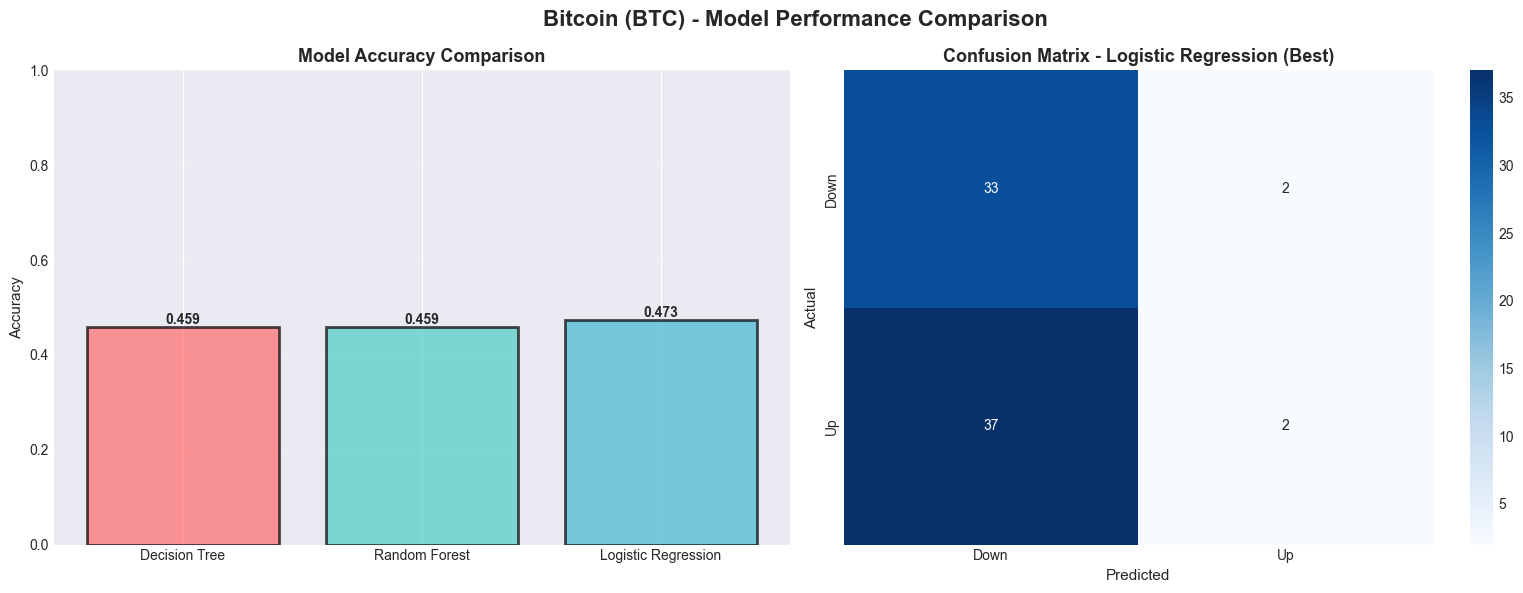

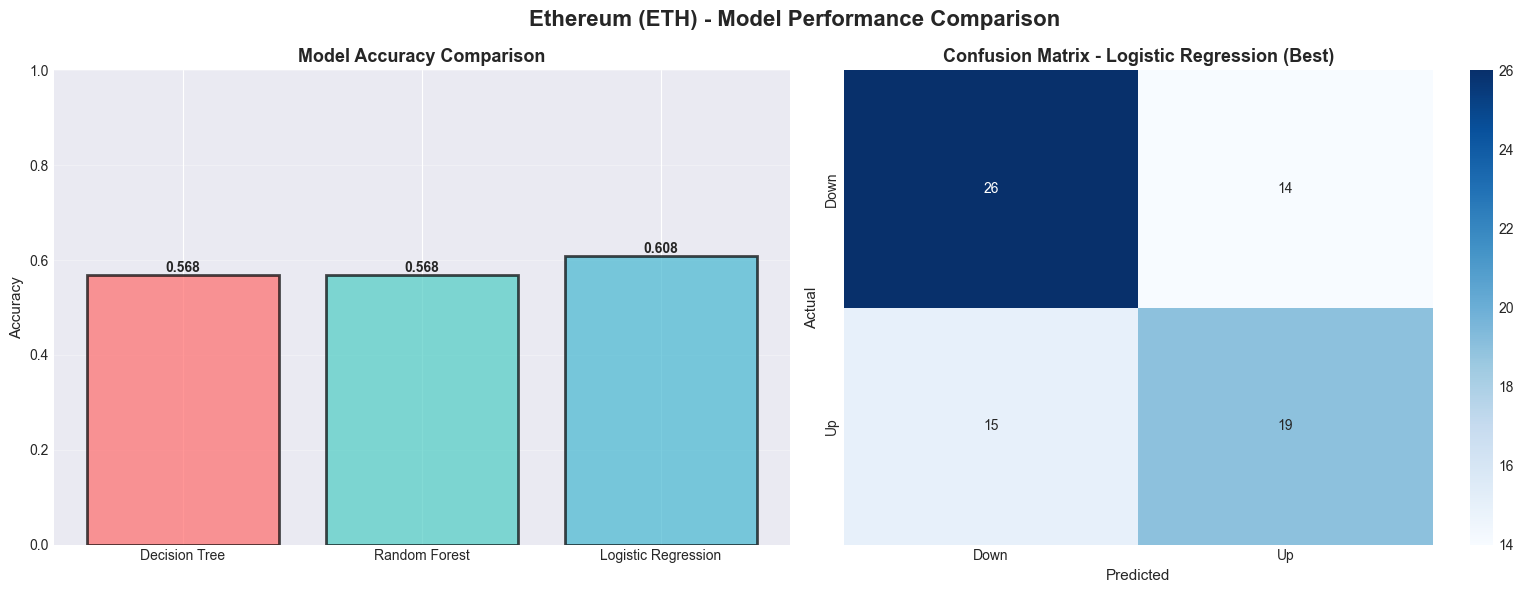

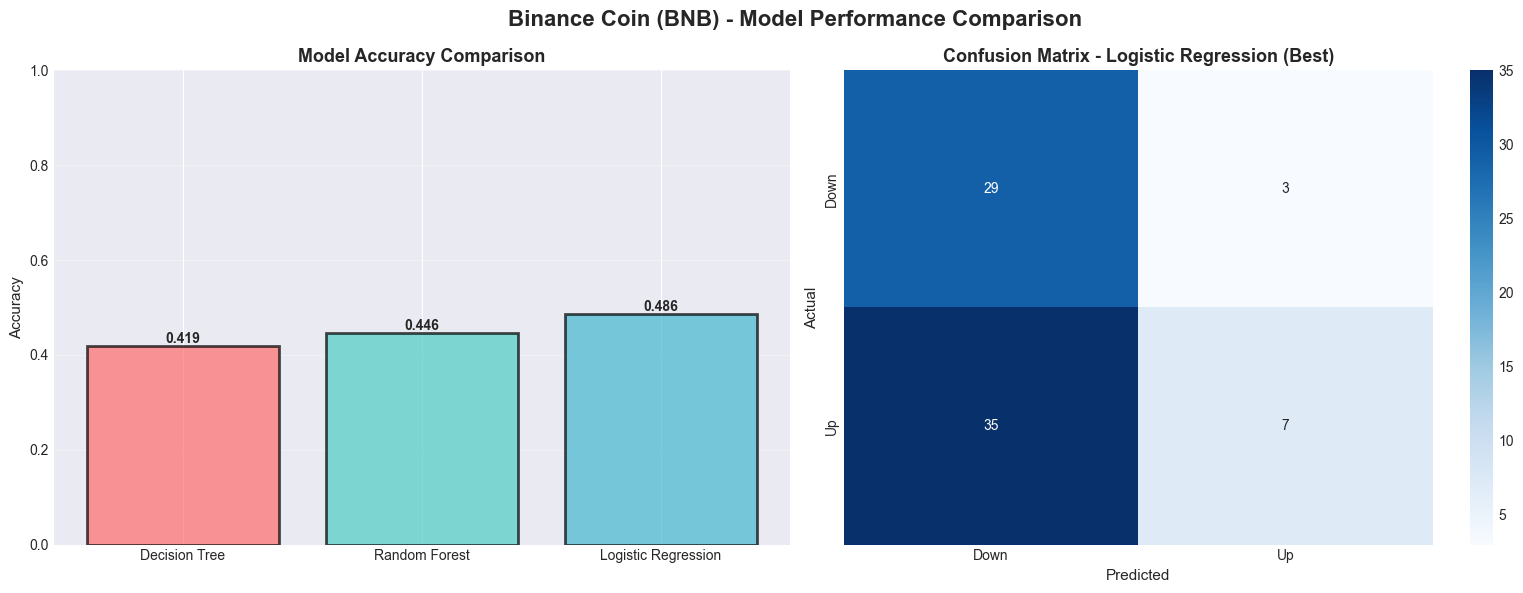

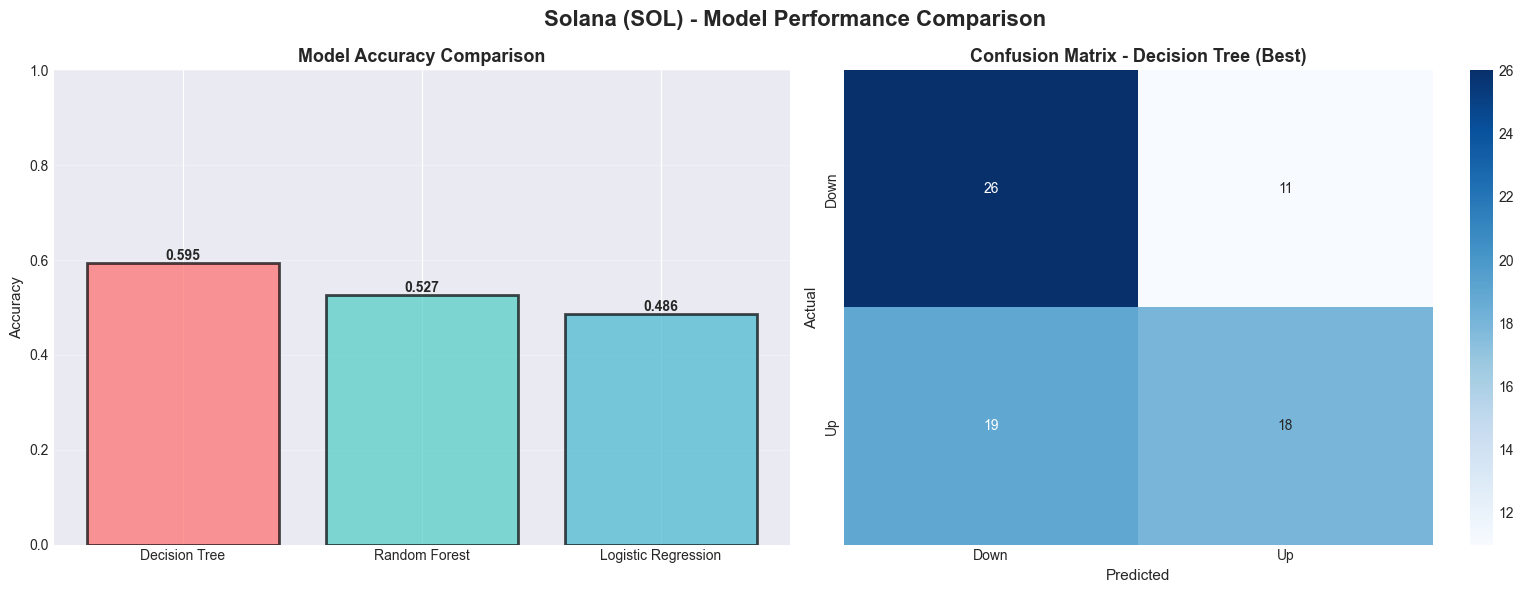

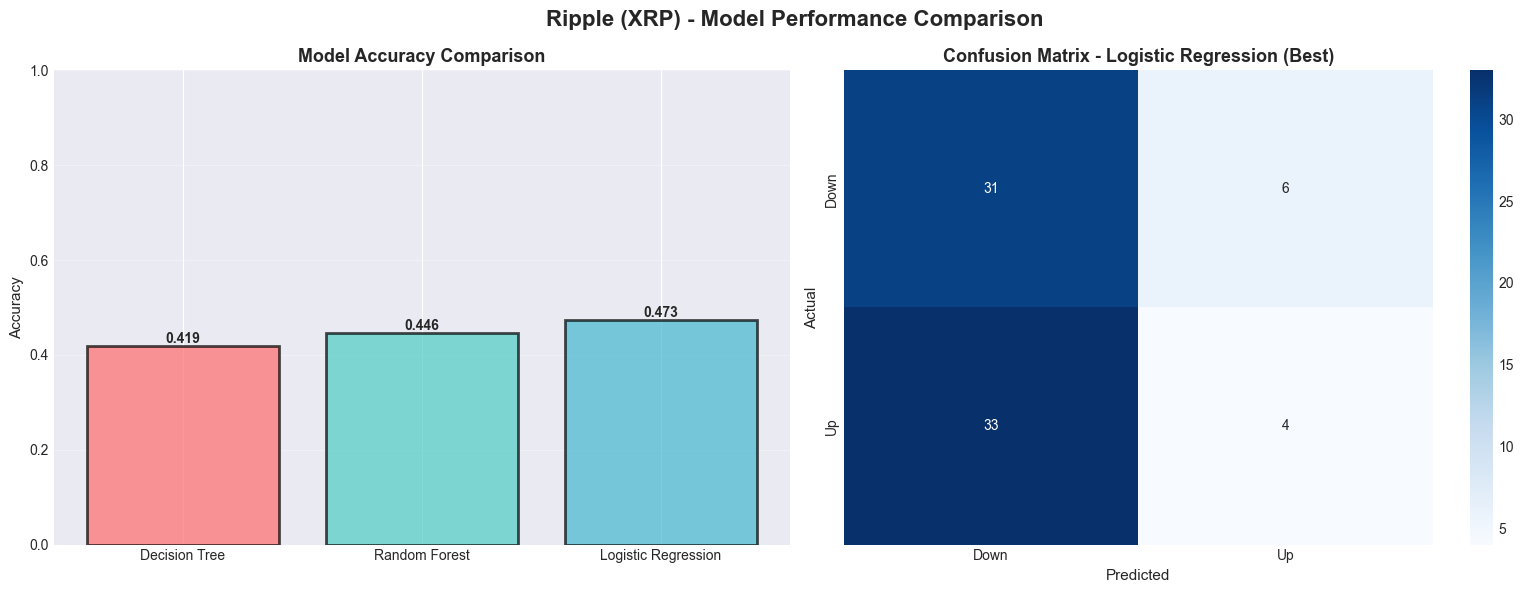

In [44]:
# Visualize model performance comparison
def plot_model_comparison(results_dict, crypto_name):
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle(f'{crypto_name} - Model Performance Comparison', fontsize=16, fontweight='bold')
    
    # Accuracy comparison
    ax1 = axes[0]
    models = list(results_dict.keys())
    accuracies = [results_dict[m]['accuracy'] for m in models]
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']
    
    bars = ax1.bar(models, accuracies, color=colors, alpha=0.7, edgecolor='black', linewidth=2)
    ax1.set_title('Model Accuracy Comparison', fontsize=13, fontweight='bold')
    ax1.set_ylabel('Accuracy', fontsize=11)
    ax1.set_ylim(0, 1)
    ax1.grid(True, alpha=0.3, axis='y')
    
    # Add value labels
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    # Confusion matrix for best model
    ax2 = axes[1]
    best_model_name = max(results_dict, key=lambda x: results_dict[x]['accuracy'])
    best_result = results_dict[best_model_name]
    
    cm = confusion_matrix(best_result['y_test'], best_result['predictions'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax2, 
                xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
    ax2.set_title(f'Confusion Matrix - {best_model_name} (Best)', fontsize=13, fontweight='bold')
    ax2.set_ylabel('Actual', fontsize=11)
    ax2.set_xlabel('Predicted', fontsize=11)
    
    plt.tight_layout()
    plt.show()

# Plot comparisons for all cryptocurrencies
plot_model_comparison(btc_results, 'Bitcoin (BTC)')
plot_model_comparison(eth_results, 'Ethereum (ETH)')
plot_model_comparison(bnb_results, 'Binance Coin (BNB)')
plot_model_comparison(sol_results, 'Solana (SOL)')
plot_model_comparison(xrp_results, 'Ripple (XRP)')

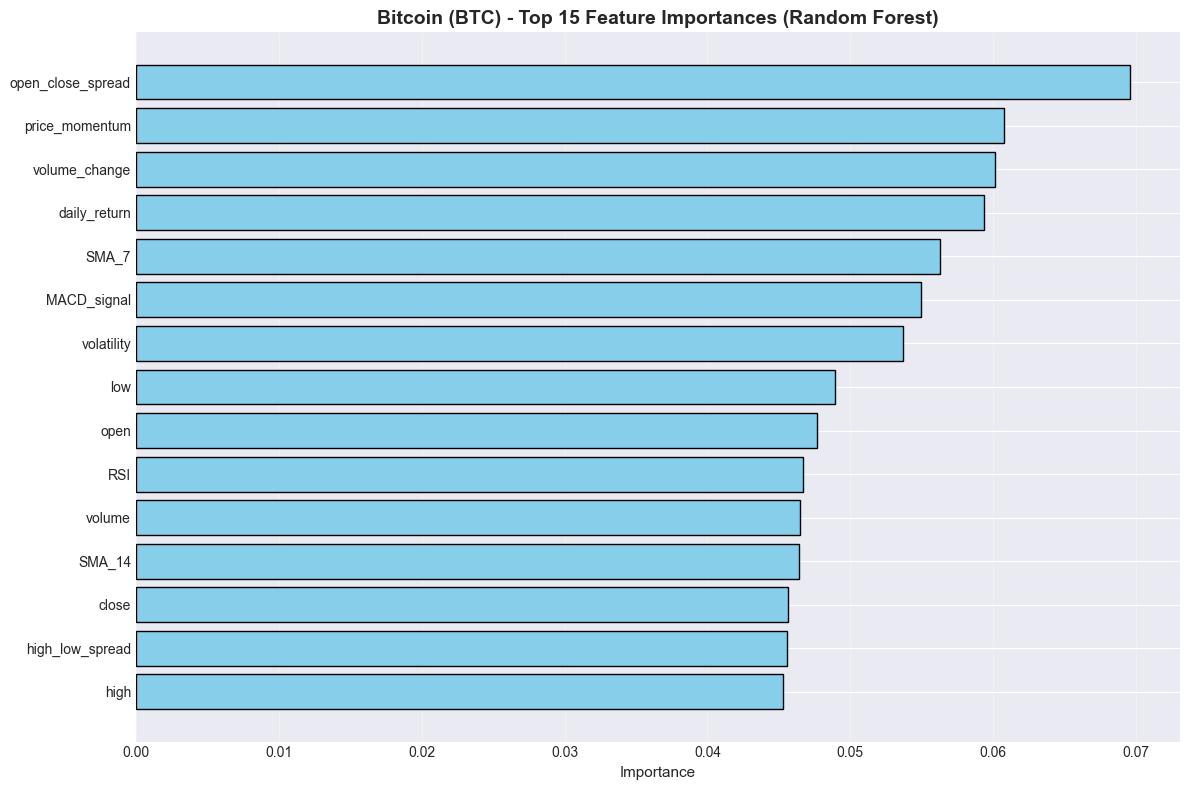

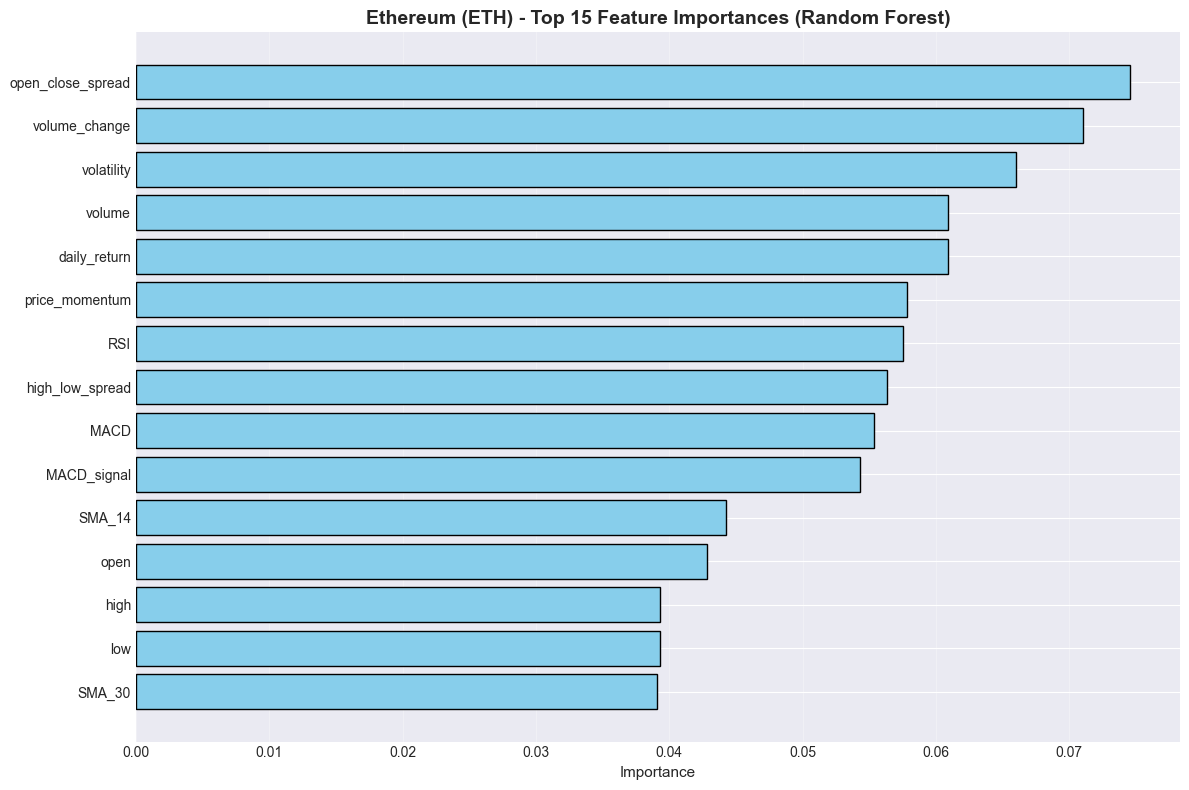

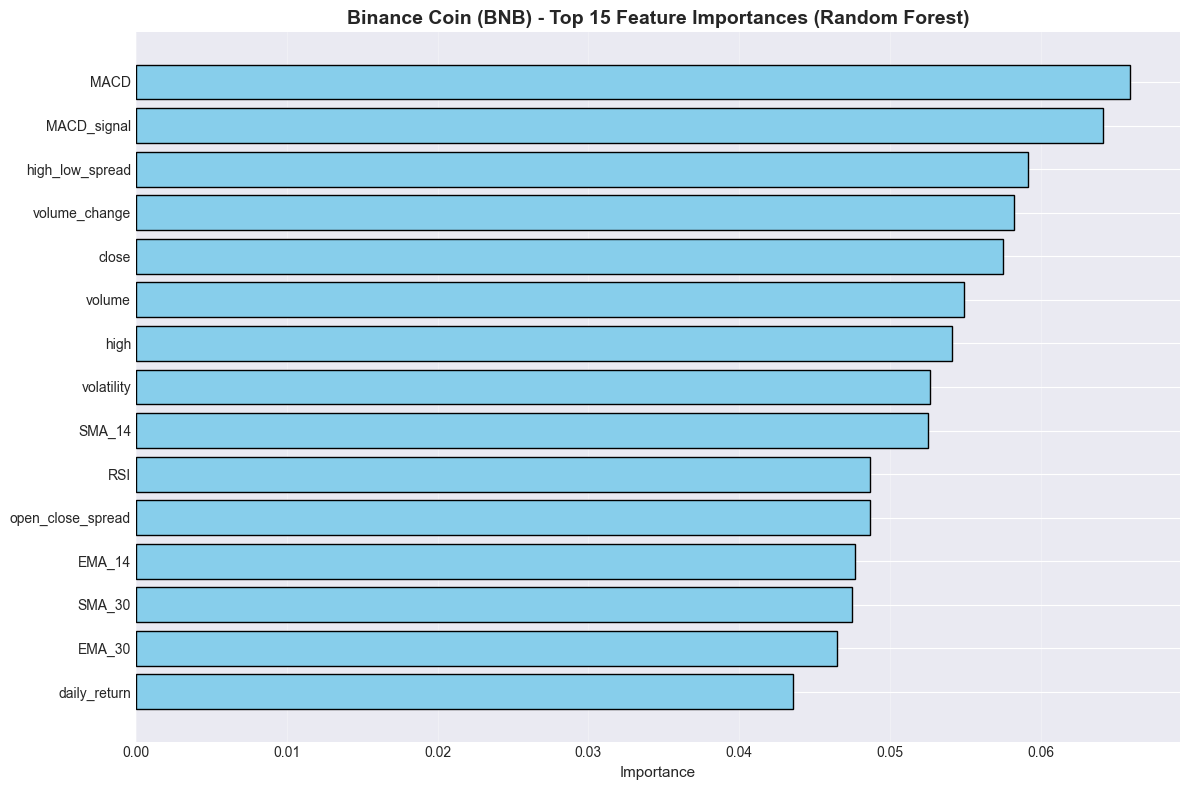

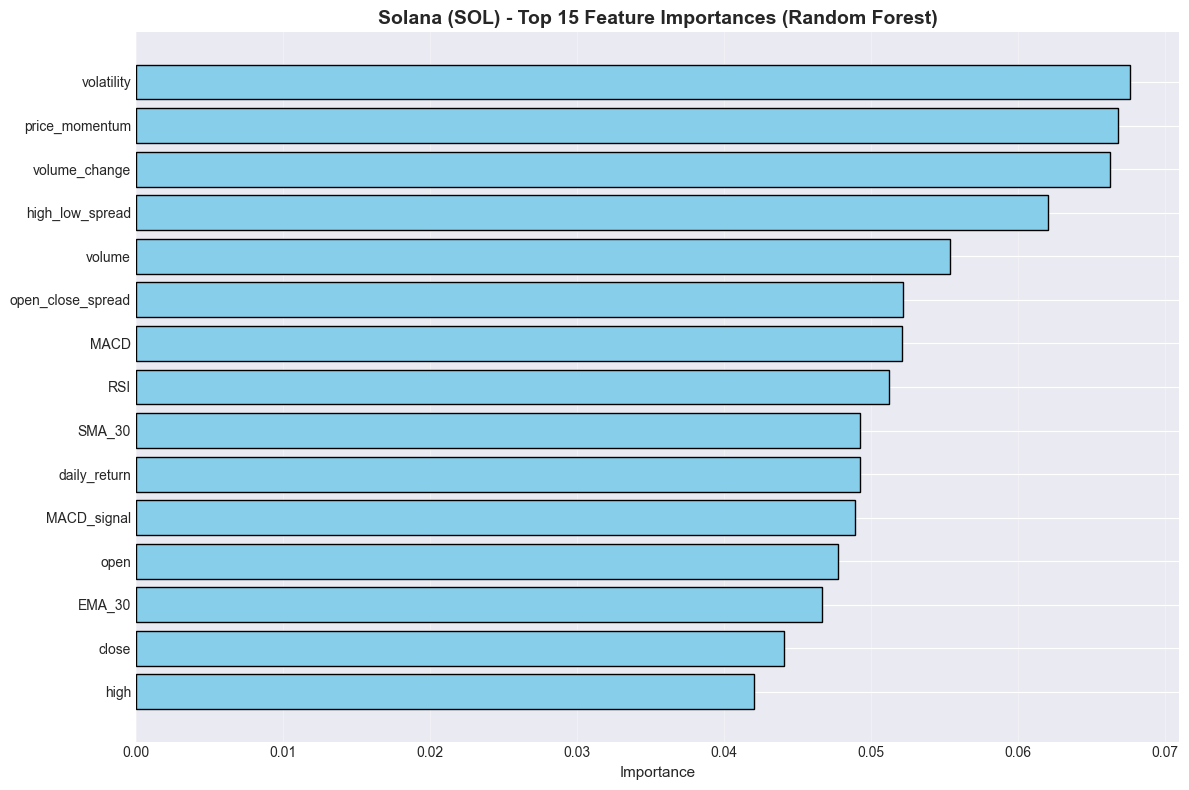

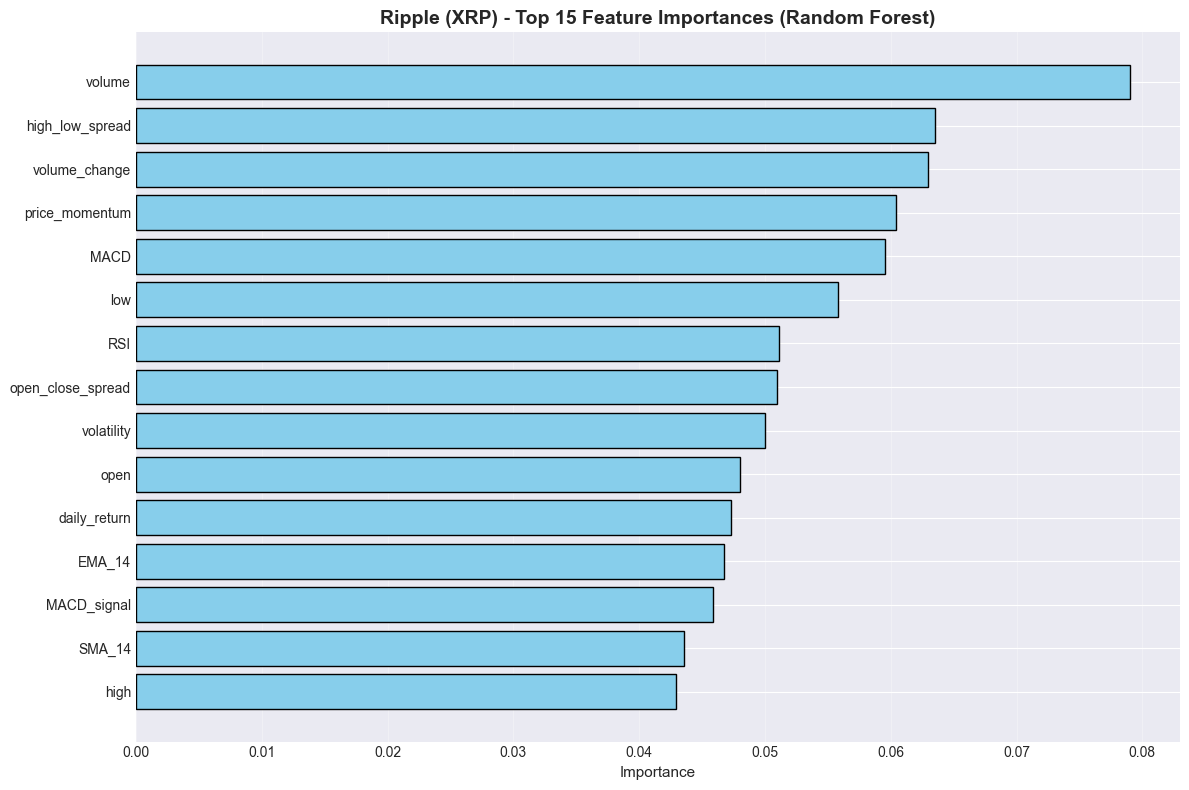

In [45]:
# Feature importance analysis (using Random Forest)
def plot_feature_importance(results, X, crypto_name, features):
    rf_model = results['Random Forest']['model']
    
    # Get feature importances
    importances = rf_model.feature_importances_
    indices = np.argsort(importances)[::-1][:15]  # Top 15 features
    
    plt.figure(figsize=(12, 8))
    plt.title(f'{crypto_name} - Top 15 Feature Importances (Random Forest)', 
              fontsize=14, fontweight='bold')
    plt.barh(range(len(indices)), importances[indices], color='skyblue', edgecolor='black')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Importance', fontsize=11)
    plt.gca().invert_yaxis()
    plt.grid(True, alpha=0.3, axis='x')
    plt.tight_layout()
    plt.show()

# Plot feature importance for all cryptocurrencies
plot_feature_importance(btc_results, btc_X, 'Bitcoin (BTC)', features)
plot_feature_importance(eth_results, eth_X, 'Ethereum (ETH)', features)
plot_feature_importance(bnb_results, bnb_X, 'Binance Coin (BNB)', features)
plot_feature_importance(sol_results, sol_X, 'Solana (SOL)', features)
plot_feature_importance(xrp_results, xrp_X, 'Ripple (XRP)', features)

**Machine Learning Insights:**
- **Accuracy**: Measures overall correctness of predictions
- **Precision**: Of all predicted "Up" movements, how many were correct
- **Recall**: Of all actual "Up" movements, how many did we catch
- **Feature Importance**: Shows which indicators are most predictive
- **XGBoost** typically performs best due to its ensemble approach and regularization

---


### Future Price Predictions

Using the best-performing model (XGBoost) to make future predictions and analyze trends.

In [46]:
# Function to make future predictions
def predict_future(df, results, X, crypto_name, days=30):
    print(f"\n{'='*60}")
    print(f"Future Predictions for {crypto_name}")
    print(f"{'='*60}")
    
    # Choose best available model (prefer XGBoost > Random Forest > Decision Tree > Logistic Regression)
    preferred_order = ['XGBoost', 'Random Forest', 'Decision Tree', 'Logistic Regression']
    chosen_name = None
    for m in preferred_order:
        if m in results:
            chosen_name = m
            break
    
    print(f"Using model for prediction: {chosen_name}")
    model = results[chosen_name]['model']
    
    # For Logistic Regression, use scaled features
    scaler = results[chosen_name]['scaler']
    last_data = X.iloc[-1:].copy()
    if scaler is not None:
        last_data_for_model = scaler.transform(last_data)
    else:
        last_data_for_model = last_data
    
    current_price = df['close'].iloc[-1]
    predictions = []
    predicted_prices = [current_price]
    
    for i in range(days):
        pred = model.predict(last_data_for_model)[0]
        
        # Some models may not have predict_proba (but ours do)
        try:
            proba = model.predict_proba(last_data_for_model)[0]
            confidence = proba[pred]
        except Exception:
            confidence = np.nan
        
        avg_return = df['daily_return'].mean() / 100
        volatility = df['daily_return'].std() / 100
        
        if pred == 1:  # UP
            price_change = current_price * (avg_return + 0.5 * volatility)
        else:          # DOWN
            price_change = current_price * (avg_return - 0.5 * volatility)
        
        current_price = current_price + price_change
        predicted_prices.append(current_price)
        predictions.append({
            'day': i + 1,
            'direction': 'UP' if pred == 1 else 'DOWN',
            'confidence': confidence,
            'predicted_price': current_price
        })
    
    pred_df = pd.DataFrame(predictions)
    print(f"\nPredicted trend for next {days} days (first 10 rows):")
    print(pred_df.head(10))
    
    return pred_df, predicted_prices

# Make predictions for all cryptocurrencies
btc_pred, btc_future_prices = predict_future(btc_df, btc_results, btc_X, 'Bitcoin (BTC)', days=30)
eth_pred, eth_future_prices = predict_future(eth_df, eth_results, eth_X, 'Ethereum (ETH)', days=30)
bnb_pred, bnb_future_prices = predict_future(bnb_df, bnb_results, bnb_X, 'Binance Coin (BNB)', days=30)
sol_pred, sol_future_prices = predict_future(sol_df, sol_results, sol_X, 'Solana (SOL)', days=30)
xrp_pred, xrp_future_prices = predict_future(xrp_df, xrp_results, xrp_X, 'Ripple (XRP)', days=30)


Future Predictions for Bitcoin (BTC)
Using model for prediction: Random Forest

Predicted trend for next 30 days (first 10 rows):
   day direction  confidence  predicted_price
0    1      DOWN    0.522182    100645.087010
1    2      DOWN    0.522182     99637.182978
2    3      DOWN    0.522182     98639.372540
3    4      DOWN    0.522182     97651.554613
4    5      DOWN    0.522182     96673.629128
5    6      DOWN    0.522182     95705.497017
6    7      DOWN    0.522182     94747.060206
7    8      DOWN    0.522182     93798.221601
8    9      DOWN    0.522182     92858.885083
9   10      DOWN    0.522182     91928.955491

Future Predictions for Ethereum (ETH)
Using model for prediction: Random Forest

Predicted trend for next 30 days (first 10 rows):
   day direction  confidence  predicted_price
0    1      DOWN    0.516434      3351.255380
1    2      DOWN    0.516434      3290.536934
2    3      DOWN    0.516434      3230.918592
3    4      DOWN    0.516434      3172.380423
4

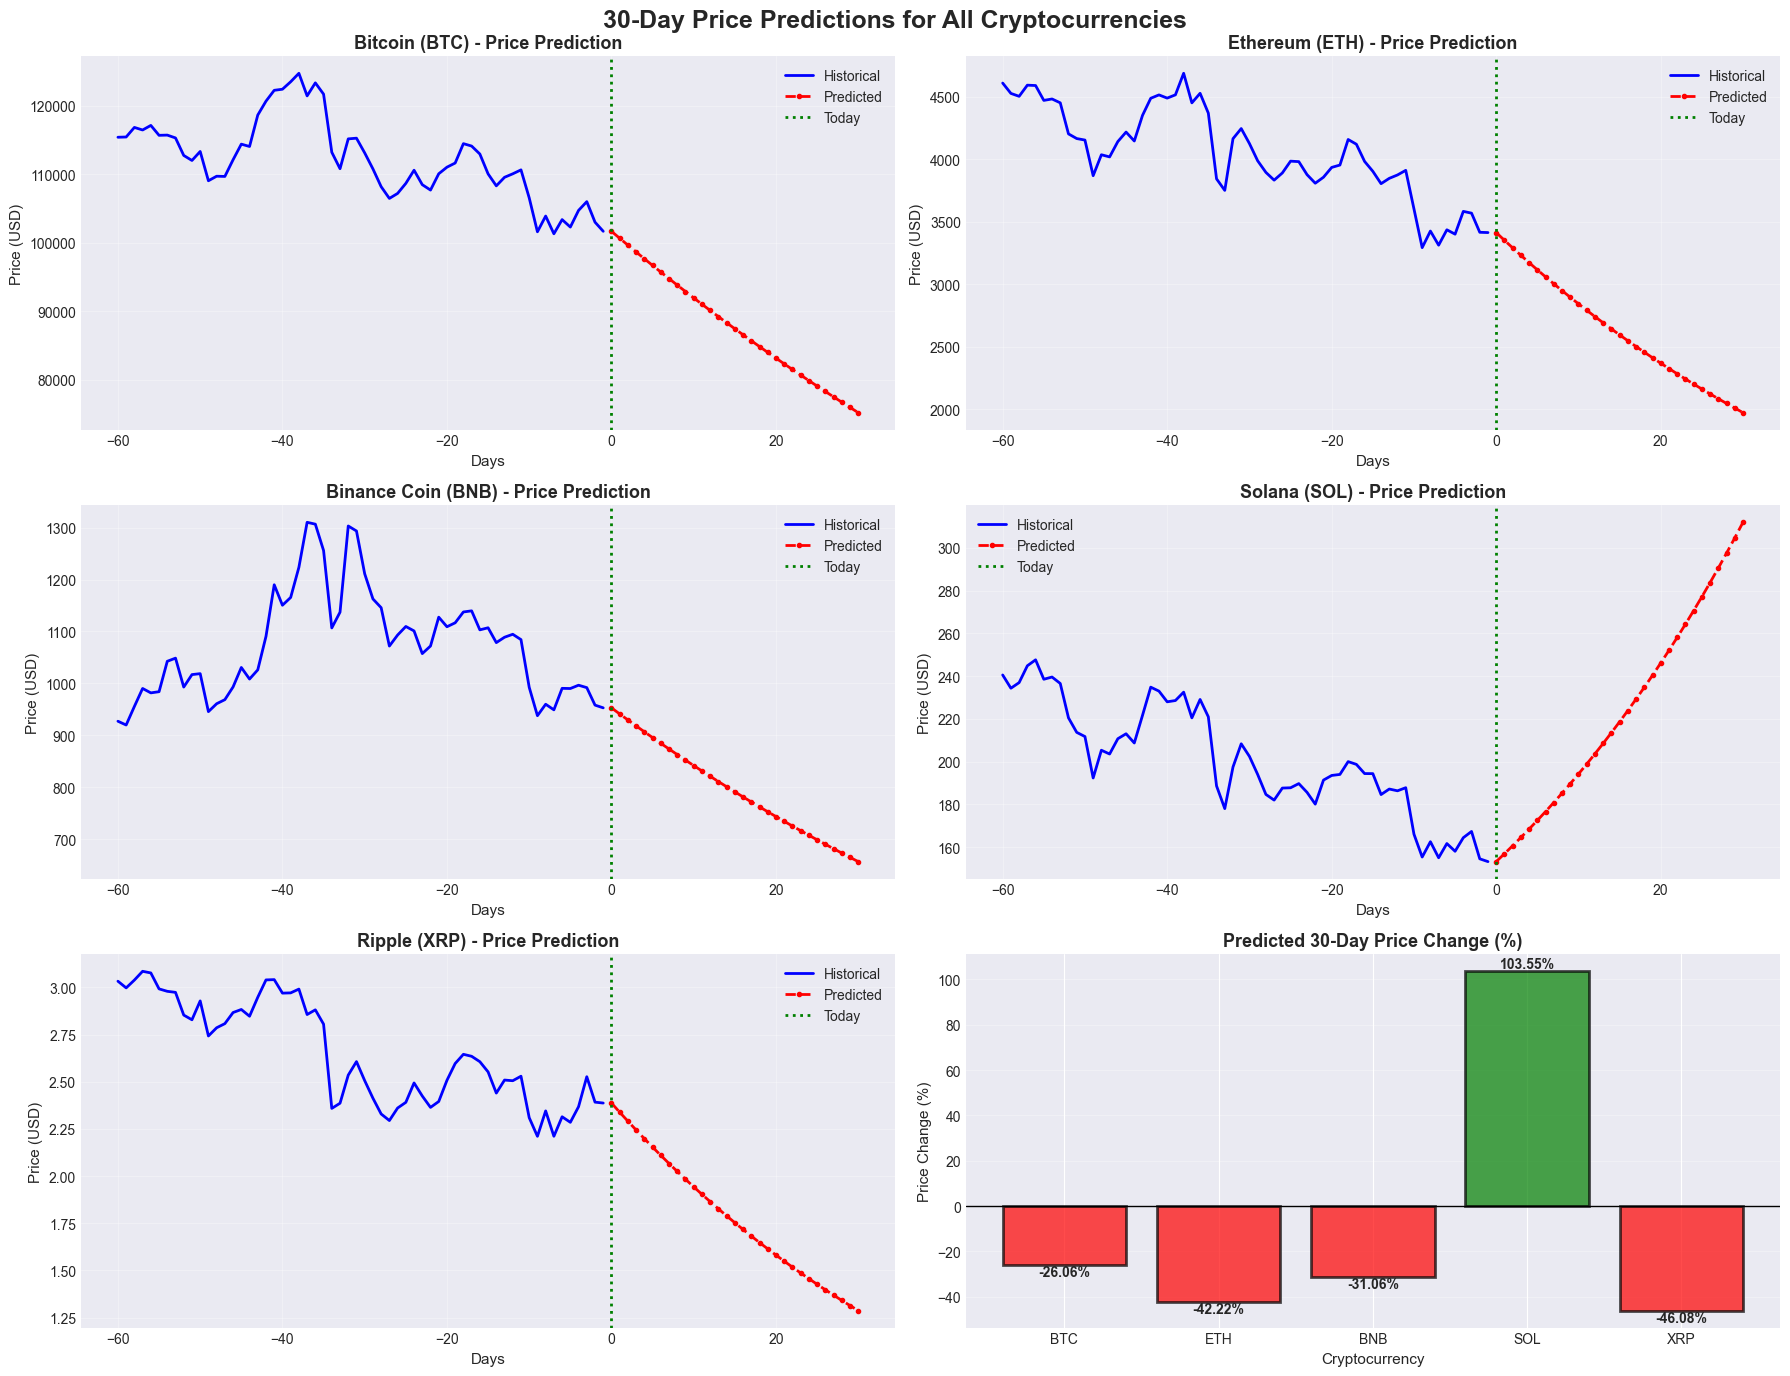

In [47]:
# Visualize future predictions
fig, axes = plt.subplots(3, 2, figsize=(18, 14))
fig.suptitle('30-Day Price Predictions for All Cryptocurrencies', fontsize=18, fontweight='bold')

predictions_data = [
    (btc_df, btc_future_prices, 'BTC', 'Bitcoin', axes[0, 0]),
    (eth_df, eth_future_prices, 'ETH', 'Ethereum', axes[0, 1]),
    (bnb_df, bnb_future_prices, 'BNB', 'Binance Coin', axes[1, 0]),
    (sol_df, sol_future_prices, 'SOL', 'Solana', axes[1, 1]),
    (xrp_df, xrp_future_prices, 'XRP', 'Ripple', axes[2, 0])
]

for df, future_prices, symbol, name, ax in predictions_data:
    # Historical prices (last 60 days)
    historical = df['close'].tail(60).values
    historical_dates = range(-len(historical), 0)
    future_dates = range(0, len(future_prices))
    
    ax.plot(historical_dates, historical, label='Historical', linewidth=2, color='blue')
    ax.plot(future_dates, future_prices, label='Predicted', linewidth=2, 
            color='red', linestyle='--', marker='o', markersize=3)
    ax.axvline(x=0, color='green', linestyle=':', linewidth=2, label='Today')
    ax.set_title(f'{name} ({symbol}) - Price Prediction', fontsize=13, fontweight='bold')
    ax.set_xlabel('Days', fontsize=11)
    ax.set_ylabel('Price (USD)', fontsize=11)
    ax.legend()
    ax.grid(True, alpha=0.3)

# Summary comparison
ax = axes[2, 1]
current_prices = [btc_df['close'].iloc[-1], eth_df['close'].iloc[-1], 
                  bnb_df['close'].iloc[-1], sol_df['close'].iloc[-1], xrp_df['close'].iloc[-1]]
predicted_30d = [btc_future_prices[-1], eth_future_prices[-1], 
                 bnb_future_prices[-1], sol_future_prices[-1], xrp_future_prices[-1]]
percent_changes = [(pred - curr) / curr * 100 for curr, pred in zip(current_prices, predicted_30d)]

symbols = ['BTC', 'ETH', 'BNB', 'SOL', 'XRP']
colors = ['green' if x > 0 else 'red' for x in percent_changes]

bars = ax.bar(symbols, percent_changes, color=colors, alpha=0.7, edgecolor='black', linewidth=2)
ax.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax.set_title('Predicted 30-Day Price Change (%)', fontsize=13, fontweight='bold')
ax.set_xlabel('Cryptocurrency', fontsize=11)
ax.set_ylabel('Price Change (%)', fontsize=11)
ax.grid(True, alpha=0.3, axis='y')

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}%',
            ha='center', va='bottom' if height > 0 else 'top', 
            fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

In [48]:
# Prediction summary table
print("\n" + "="*80)
print("30-DAY PREDICTION SUMMARY")
print("="*80)

summary_predictions = []
for name, df, future_prices in [
    ('BTC', btc_df, btc_future_prices),
    ('ETH', eth_df, eth_future_prices),
    ('BNB', bnb_df, bnb_future_prices),
    ('SOL', sol_df, sol_future_prices),
    ('XRP', xrp_df, xrp_future_prices)
]:
    current = df['close'].iloc[-1]
    predicted = future_prices[-1]
    change = predicted - current
    change_pct = (change / current) * 100
    
    summary_predictions.append({
        'Crypto': name,
        'Current Price': f'${current:,.2f}',
        'Predicted Price (30d)': f'${predicted:,.2f}',
        'Change': f'${change:,.2f}',
        'Change (%)': f'{change_pct:+.2f}%',
        'Trend': '📈 Bullish' if change > 0 else '📉 Bearish'
    })

pred_summary_df = pd.DataFrame(summary_predictions)
print(pred_summary_df.to_string(index=False))


30-DAY PREDICTION SUMMARY
Crypto Current Price Predicted Price (30d)      Change Change (%)     Trend
   BTC   $101,663.19            $75,167.40 $-26,495.78    -26.06% 📉 Bearish
   ETH     $3,413.09             $1,972.09  $-1,441.01    -42.22% 📉 Bearish
   BNB       $953.01               $656.99    $-296.02    -31.06% 📉 Bearish
   SOL       $153.26               $311.96     $158.70   +103.55% 📈 Bullish
   XRP         $2.39                 $1.29      $-1.10    -46.08% 📉 Bearish


**Prediction Insights:**
- Predictions are based on historical patterns and technical indicators
- **Important**: These are statistical predictions, not financial advice
- Cryptocurrency markets are highly volatile and unpredictable
- Multiple factors (news, regulations, market sentiment) can affect actual prices
- Use predictions as one of many tools for analysis, not as sole decision-making criteria

---

### Final Insights and Conclusions

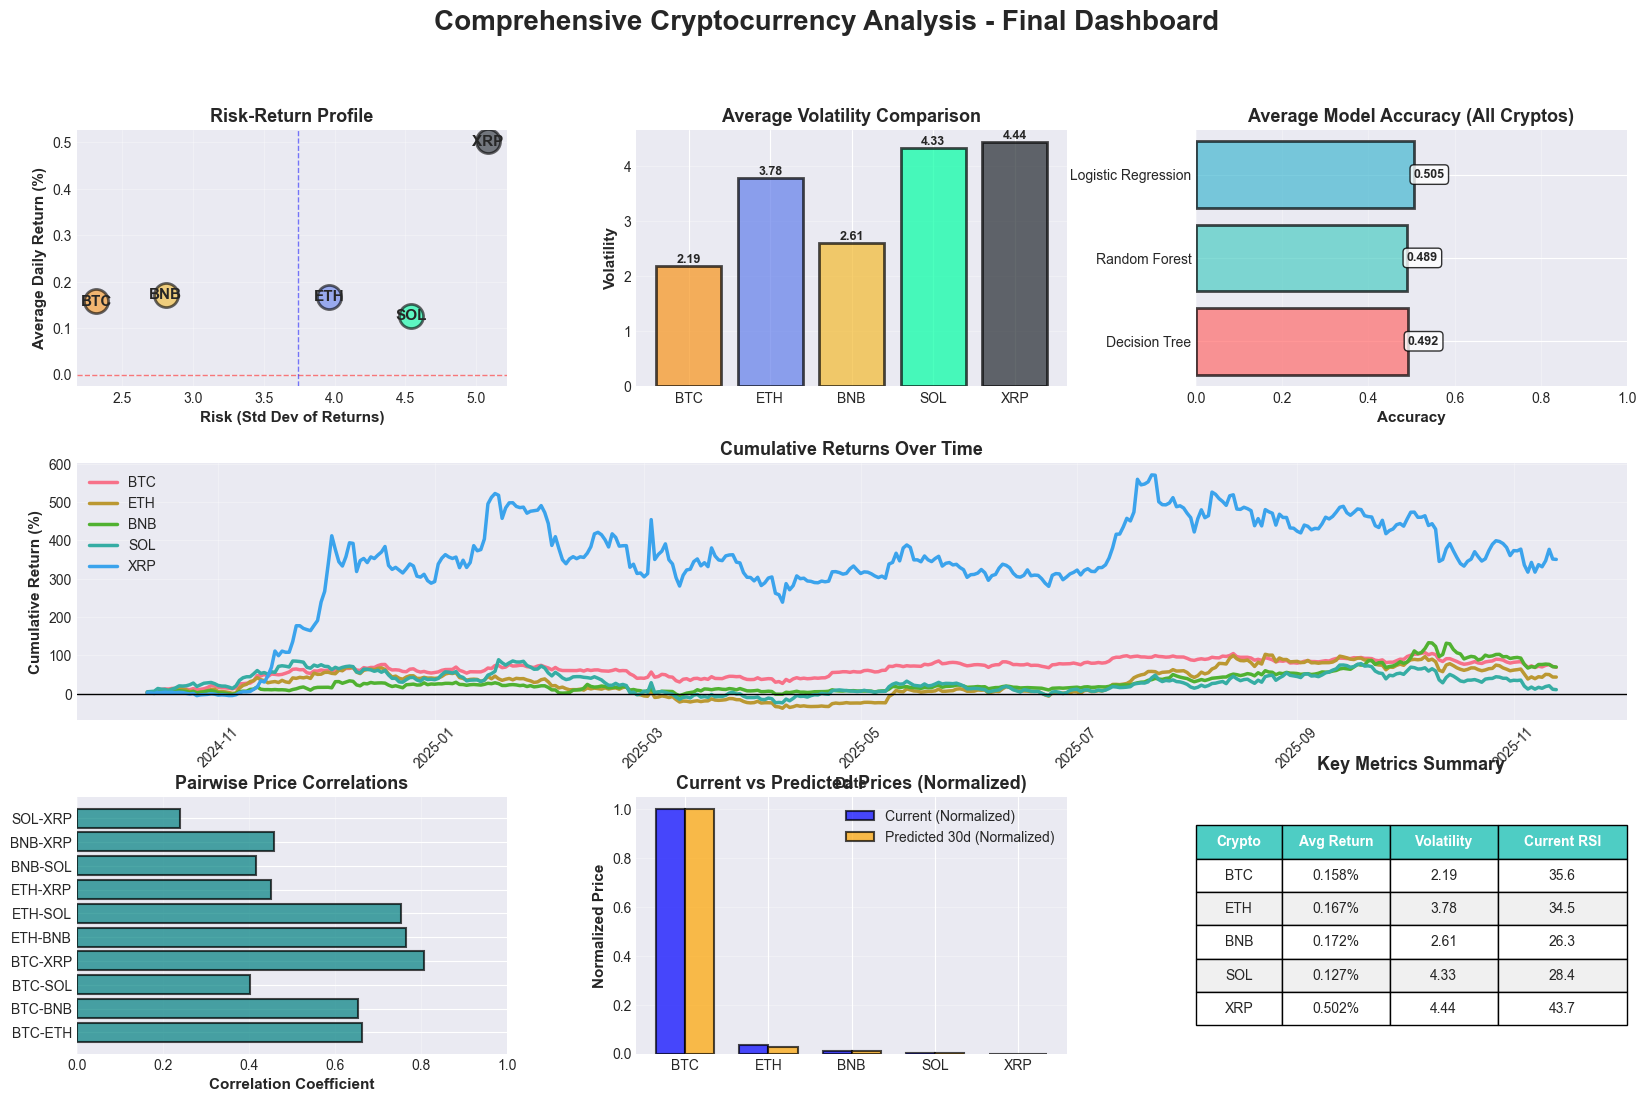


✓ Comprehensive dashboard created and saved!


In [50]:
# Create comprehensive summary visualization
fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

fig.suptitle('Comprehensive Cryptocurrency Analysis - Final Dashboard', 
             fontsize=20, fontweight='bold')

# 1. Risk-Return Profile
ax1 = fig.add_subplot(gs[0, 0])
cryptos_list = ['BTC', 'ETH', 'BNB', 'SOL', 'XRP']
returns = [btc_df['daily_return'].mean(), eth_df['daily_return'].mean(), 
           bnb_df['daily_return'].mean(), sol_df['daily_return'].mean(), 
           xrp_df['daily_return'].mean()]
risks = [btc_df['daily_return'].std(), eth_df['daily_return'].std(), 
         bnb_df['daily_return'].std(), sol_df['daily_return'].std(), 
         xrp_df['daily_return'].std()]
colors_scatter = ['#F7931A', '#627EEA', '#F3BA2F', '#00FFA3', '#23292F']

for i, crypto in enumerate(cryptos_list):
    ax1.scatter(risks[i], returns[i], s=300, alpha=0.6, color=colors_scatter[i], 
                edgecolors='black', linewidth=2)
    ax1.annotate(crypto, (risks[i], returns[i]), fontsize=11, fontweight='bold',
                ha='center', va='center')

ax1.axhline(y=0, color='red', linestyle='--', linewidth=1, alpha=0.5)
ax1.axvline(x=np.mean(risks), color='blue', linestyle='--', linewidth=1, alpha=0.5)
ax1.set_xlabel('Risk (Std Dev of Returns)', fontsize=11, fontweight='bold')
ax1.set_ylabel('Average Daily Return (%)', fontsize=11, fontweight='bold')
ax1.set_title('Risk-Return Profile', fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.3)

# 2. Volatility Comparison
ax2 = fig.add_subplot(gs[0, 1])
volatilities = [btc_df['volatility'].mean(), eth_df['volatility'].mean(),
                bnb_df['volatility'].mean(), sol_df['volatility'].mean(),
                xrp_df['volatility'].mean()]
bars = ax2.bar(cryptos_list, volatilities, color=colors_scatter, alpha=0.7, 
               edgecolor='black', linewidth=2)
ax2.set_title('Average Volatility Comparison', fontsize=13, fontweight='bold')
ax2.set_ylabel('Volatility', fontsize=11, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')

for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}',
            ha='center', va='bottom', fontsize=9, fontweight='bold')

# 3. Model Performance Summary
ax3 = fig.add_subplot(gs[0, 2])
all_results = [btc_results, eth_results, bnb_results, sol_results, xrp_results]

# Get model names that actually exist in results (handles missing XGBoost)
model_names = list(all_results[0].keys())
avg_accuracies = []

for model_name in model_names:
    accuracies = [results[model_name]['accuracy'] for results in all_results]
    avg_accuracies.append(np.mean(accuracies))

# Dynamic colors based on number of models
color_map = {'Decision Tree': '#FF6B6B', 'Random Forest': '#4ECDC4', 
             'Logistic Regression': '#45B7D1', 'XGBoost': '#FFA07A'}
bar_colors = [color_map.get(m, '#CCCCCC') for m in model_names]

bars = ax3.barh(model_names, avg_accuracies, color=bar_colors,
                alpha=0.7, edgecolor='black', linewidth=2)
ax3.set_title('Average Model Accuracy (All Cryptos)', fontsize=13, fontweight='bold')
ax3.set_xlabel('Accuracy', fontsize=11, fontweight='bold')
ax3.set_xlim(0, 1)
ax3.grid(True, alpha=0.3, axis='x')

for i, bar in enumerate(bars):
    width = bar.get_width()
    ax3.text(width, bar.get_y() + bar.get_height()/2.,
            f'{width:.3f}',
            ha='left', va='center', fontsize=9, fontweight='bold', 
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# 4. Cumulative Returns
ax4 = fig.add_subplot(gs[1, :])
ax4.plot(btc_df['timestamp'], btc_df['cumulative_return'] * 100, label='BTC', linewidth=2.5)
ax4.plot(eth_df['timestamp'], eth_df['cumulative_return'] * 100, label='ETH', linewidth=2.5)
ax4.plot(bnb_df['timestamp'], bnb_df['cumulative_return'] * 100, label='BNB', linewidth=2.5)
ax4.plot(sol_df['timestamp'], sol_df['cumulative_return'] * 100, label='SOL', linewidth=2.5)
ax4.plot(xrp_df['timestamp'], xrp_df['cumulative_return'] * 100, label='XRP', linewidth=2.5)
ax4.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax4.set_title('Cumulative Returns Over Time', fontsize=13, fontweight='bold')
ax4.set_xlabel('Date', fontsize=11, fontweight='bold')
ax4.set_ylabel('Cumulative Return (%)', fontsize=11, fontweight='bold')
ax4.legend(loc='best', fontsize=10)
ax4.grid(True, alpha=0.3)
ax4.tick_params(axis='x', rotation=45)

# 5. Price Correlation Network
ax5 = fig.add_subplot(gs[2, 0])
correlation_values = []
pairs = []
for i in range(len(cryptos_list)):
    for j in range(i+1, len(cryptos_list)):
        pairs.append(f'{cryptos_list[i]}-{cryptos_list[j]}')
        correlation_values.append(correlation_matrix.iloc[i, j])

ax5.barh(pairs, correlation_values, color='teal', alpha=0.7, edgecolor='black', linewidth=1.5)
ax5.set_title('Pairwise Price Correlations', fontsize=13, fontweight='bold')
ax5.set_xlabel('Correlation Coefficient', fontsize=11, fontweight='bold')
ax5.set_xlim(0, 1)
ax5.grid(True, alpha=0.3, axis='x')

# 6. Predicted vs Current Prices
ax6 = fig.add_subplot(gs[2, 1])
current_prices_norm = [p / max(current_prices) for p in current_prices]
predicted_prices_norm = [p / max(predicted_30d) for p in predicted_30d]

x = np.arange(len(cryptos_list))
width = 0.35

bars1 = ax6.bar(x - width/2, current_prices_norm, width, label='Current (Normalized)', 
                color='blue', alpha=0.7, edgecolor='black', linewidth=1.5)
bars2 = ax6.bar(x + width/2, predicted_prices_norm, width, label='Predicted 30d (Normalized)', 
                color='orange', alpha=0.7, edgecolor='black', linewidth=1.5)

ax6.set_title('Current vs Predicted Prices (Normalized)', fontsize=13, fontweight='bold')
ax6.set_ylabel('Normalized Price', fontsize=11, fontweight='bold')
ax6.set_xticks(x)
ax6.set_xticklabels(cryptos_list)
ax6.legend()
ax6.grid(True, alpha=0.3, axis='y')

# 7. Key Metrics Table
ax7 = fig.add_subplot(gs[2, 2])
ax7.axis('tight')
ax7.axis('off')

metrics_data = []
for name, df in [('BTC', btc_df), ('ETH', eth_df), ('BNB', bnb_df), 
                  ('SOL', sol_df), ('XRP', xrp_df)]:
    metrics_data.append([
        name,
        f'{df["daily_return"].mean():.3f}%',
        f'{df["volatility"].mean():.2f}',
        f'{df["RSI"].iloc[-1]:.1f}'
    ])

table = ax7.table(cellText=metrics_data,
                  colLabels=['Crypto', 'Avg Return', 'Volatility', 'Current RSI'],
                  cellLoc='center',
                  loc='center',
                  colWidths=[0.2, 0.25, 0.25, 0.3])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)

# Style the header
for i in range(4):
    table[(0, i)].set_facecolor('#4ECDC4')
    table[(0, i)].set_text_props(weight='bold', color='white')

# Alternate row colors
for i in range(1, len(metrics_data) + 1):
    for j in range(4):
        if i % 2 == 0:
            table[(i, j)].set_facecolor('#F0F0F0')

ax7.set_title('Key Metrics Summary', fontsize=13, fontweight='bold', pad=20)

plt.savefig('crypto_analysis_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Comprehensive dashboard created and saved!")